<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-3:-Feature-Extraction-&amp;-EDA" data-toc-modified-id="Part-3:-Feature-Extraction-&amp;-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 3: Feature Extraction &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#Loading-back-data" data-toc-modified-id="Loading-back-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading back data</a></span></li><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Dictionary</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Splitting the data</a></span></li></ul></li><li><span><a href="#Target-Variable" data-toc-modified-id="Target-Variable-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Target Variable</a></span><ul class="toc-item"><li><span><a href="#Observation" data-toc-modified-id="Observation-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Observation</a></span></li></ul></li><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Numerical Features</a></span><ul class="toc-item"><li><span><a href="#char_count" data-toc-modified-id="char_count-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>char_count</a></span></li><li><span><a href="#word_count" data-toc-modified-id="word_count-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>word_count</a></span></li><li><span><a href="#num_awards" data-toc-modified-id="num_awards-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>num_awards</a></span></li><li><span><a href="#Looking-at-Correlations" data-toc-modified-id="Looking-at-Correlations-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Looking at Correlations</a></span></li></ul></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Categorical Features</a></span><ul class="toc-item"><li><span><a href="#author" data-toc-modified-id="author-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>author</a></span></li><li><span><a href="#link_id" data-toc-modified-id="link_id-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>link_id</a></span></li><li><span><a href="#parent_id" data-toc-modified-id="parent_id-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>parent_id</a></span></li></ul></li><li><span><a href="#Textual-Features" data-toc-modified-id="Textual-Features-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Textual Features</a></span><ul class="toc-item"><li><span><a href="#Parts-Of-Speech-(POS)-Tagging" data-toc-modified-id="Parts-Of-Speech-(POS)-Tagging-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Parts-Of-Speech (POS) Tagging</a></span></li><li><span><a href="#Named-Entity-Recognition-(NER)" data-toc-modified-id="Named-Entity-Recognition-(NER)-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Named Entity Recognition (NER)</a></span></li><li><span><a href="#Ngrams" data-toc-modified-id="Ngrams-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Ngrams</a></span><ul class="toc-item"><li><span><a href="#Unigrams" data-toc-modified-id="Unigrams-1.6.3.1"><span class="toc-item-num">1.6.3.1&nbsp;&nbsp;</span>Unigrams</a></span></li><li><span><a href="#Bigrams" data-toc-modified-id="Bigrams-1.6.3.2"><span class="toc-item-num">1.6.3.2&nbsp;&nbsp;</span>Bigrams</a></span></li><li><span><a href="#Trigrams" data-toc-modified-id="Trigrams-1.6.3.3"><span class="toc-item-num">1.6.3.3&nbsp;&nbsp;</span>Trigrams</a></span></li><li><span><a href="#Quadgrams" data-toc-modified-id="Quadgrams-1.6.3.4"><span class="toc-item-num">1.6.3.4&nbsp;&nbsp;</span>Quadgrams</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Part 3: Feature Extraction & EDA


In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
import spacy
from collections import Counter
from nltk.util import ngrams # function for making ngrams

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

nlp = spacy.load('en_core_web_sm')

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) # adjust number of rows visible 


## Loading back data

In [2]:
# reading data from file
raw = pd.read_csv("data/cleaned_data.csv")
raw.head()

author    link_id   parent_id  num_awards  score  \
0      crimeo  t3_op1972  t1_h63m62g           0      0   
1     evDev84  t3_oowzq7  t1_h62gazl           0      1   
2  arnaudmrtn  t3_op1972  t1_h63ltdv           0      1   
3      crimeo  t3_ooa9hv  t1_h63llzz           0      1   
4      crimeo  t3_op1972  t1_h63lcq8           0      1   

                                                                              permalink  \
0   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m8hw/   
1  /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h63m6pq/   
2   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m62g/   
3                                    /r/Bitcoin/comments/ooa9hv/buying_the_dip/h63m4pf/   
4   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63ltdv/   

  subreddit  \
0   Bitcoin   
1   Bitcoin   
2   Bitcoin   
3   Bitcoin   
4   Bitcoin   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  body  
0                          There's a very easy solution that is fiscally responsible and doesn't require any crazy revolution or new technology. And does a significantly better job of solving than bitcoin.  It's called "raising taxes to pay for programs when you want to help the poor out."  I don't endorse printing money instead. I merely said "It is good for the poor [so long as the economy doesn't completely collapse]" which it is. It's not the best solution overall. Simple balanced budgets are.  
1                                                                                                                                                                                                                                                                                                                                                                                     Tesla was warned beforehand.  Did you see that 4chan screenshot of someone calling the 30k bounce down to the minute of the day?  
2                                                                                                                                                                                                                                                                                                                                                                        As I mentionned I don't see any mention of sustainability problem in your comment so I would assume you are not looking for a solution. I am!  
3                                                                                                                                                      Yes, and there were bankruptcies when banks failed  What does that have anything to do with the fact you are objectively wrong about loans not existing in a world with trustless currency? Nobody ever disagreed about historical bankruptcies or even mentioned it, random off topic junk.  People also used to wear pointy shoes. May as well bring that up.  
4   In real life Zimbabwe  TIL 5% inflation is "HyPeR inFlATiOn zomG ZimBabWEEEE" 🙄   You got $20,000 recently, good for you! You will buy necessary packages short term but what do you think will happen long term?  Nothing, actually, not to THAT guy. Even if it's 20% (which is highly unlikely. Maybe 20% overall spread out for awhile several years but not in one year)  * That person spent pretty much all of it since they were in an unemployed place of desperation. So their non-existent

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      3106 non-null   object
 1   link_id     3106 non-null   object
 2   parent_id   3106 non-null   object
 3   num_awards  3106 non-null   int64 
 4   score       3106 non-null   int64 
 5   permalink   3106 non-null   object
 6   subreddit   3106 non-null   object
 7   body        3106 non-null   object
dtypes: int64(2), object(6)
memory usage: 194.2+ KB


## Data Dictionary

|Feature|Type|Description|
|---|---|---|
|author|text| username of author| 
|link_id|text|id of thread containing comment| 
|parent_id|text|id of comment replied to 
|num_awards|int|awards awarded to author. More info here| 
|score|int|score assigned to comment| 
|permalink|text|url link to the comment 
|subreddit|text|subreddit the comment belongs to| 
|body|text|body text of the comment| 

In [7]:
# create a working copy so that we have an untouched version to fall back on
df = raw.copy()

In [8]:
# Setting up the stopword reference

# Stopword reference using spacy
#nlp.Defaults.stop_words.add("nt", "gon", "na", "gonna")   # use this to add ONE stopword
nlp.Defaults.stop_words |= {"nt", "gon", "na", "gonna", 've'}   # use this to add multiple stopwords
stopword_spcy = nlp.Defaults.stop_words
print(len(stopword_spcy))
print(sorted(stopword_spcy))

# Stopword reference using nltk
stopword_nltk = nltk.corpus.stopwords.words('english')
print(len(stopword_nltk))

331
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'gon', 'gonna', 'had', 'has', 'have', 'he', 'hence'

Number of sentences
Number of words
Number of characters
Average Length of words
Tweets
No of hashtags
POS Tagging (e.g. Number of Pronous)
Readability
Named Entity Recognition (NER) -> Number of People etc

In [9]:
#text = "   This is a message to be cleaned. It may involve 1000 things like: <\br>, ?, :, ''  adjacent spaces and tabs  \n   .  "

def clean_symbols(text):
    text = text.lower()                                                  # lowercase
    text = re.compile('<.+>').sub(' ', text)                             # remove html tags | regex: anything that is one or more character between <> --> empty string
    text = re.compile('^https?:\/\/.*[\r\n]*').sub('', text)             # remove url links
    text = re.compile('.https?:\/\/.*[\r\n]*').sub('', text)             # remove url links
    #text = text.translate(str.maketrans('', '', string.punctuation))     # remove punctuation
    #text = re.sub('^\d+\s', ' ', text)                                   # remove digits | regex: anything that is a digit --> one space
    text = re.sub('\s\d+', ' ', text)                                   # remove digits | regex: anything that is a digit --> one space
    text = re.sub(r'[^\w\s]', '', text)                                  # ensure "word-space-word-space" | regex: anything NOT a world followed by a space --> empty string
    text = re.sub('\s+', ' ', text.strip())                              # fix spaces | regex: anything that is one or more spaces --> one space
    return text

def preprocess(text):
    delim = ", "
    doc = nlp(text)
    sent_count = len(list(doc.sents)) # using raw text instead to get a more accurate count
    char_count = len(text) 
    
    # intialize the doc object
    doc = nlp(clean_symbols(text))
    
    token_list = [token.text for token in doc if token.is_punct != True and len(token) > 1 and len(token) < 20]
    stopword_list = [token.text for token in doc if not(token.text in stopword_spcy) and token.is_punct != True and len(token) > 1 and len(token) < 20]
    lemma_list = [token.lemma_.lower() for token in doc if not(token.text in stopword_spcy) and token.is_punct != True and len(token) > 1 and len(token) < 20 and token.lemma_.isalpha]
    
    word_count = len(token_list)
    
    # convert to string for easier processing later
    token_str = delim.join(token_list)
    stopword_str = delim.join(stopword_list)
    lemma_str = delim.join(lemma_list)
    
    return token_str, stopword_str, lemma_str, sent_count, word_count, char_count


# Using this function to aid with inspecting the data
def peek(search_term:str, subreddit:str=None): 
    if subreddit == 'btc':
        display(btc_df[btc_df['body_no_stop'].str.contains(search_term)])
    if subreddit == 'eth':
        display(eth_df[eth_df['body_no_stop'].str.contains(search_term)])
    if None:    
        display(df[df['body_no_stop'].str.contains(search_term)])    

In [11]:
# Preprocessing the data
df['body_no_sym'] = df['body'].apply(lambda x: clean_symbols(x))
df['body_tok'], df['body_no_stop'], df['body_lemma'], df['sent_count'],df['word_count'],df['char_count'] = zip(*df['body'].map(preprocess))
display(df.head(10))

author    link_id   parent_id  num_awards  score  \
0            crimeo  t3_op1972  t1_h63m62g           0      0   
1           evDev84  t3_oowzq7  t1_h62gazl           0      1   
2        arnaudmrtn  t3_op1972  t1_h63ltdv           0      1   
3            crimeo  t3_ooa9hv  t1_h63llzz           0      1   
4            crimeo  t3_op1972  t1_h63lcq8           0      1   
5          walloon5  t3_op04lo  t1_h62treg           0      1   
6     TheWanderer09  t3_op8cdl  t1_h63lf0j           0      1   
7         smartorgs  t3_ooa9hv  t1_h63lay2           0      1   
8  EgonHorsePuncher  t3_op3k38   t3_op3k38           0      1   
9            crimeo  t3_ooa9hv  t1_h63ld2h           0      1   

                                                                              permalink  \
0   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m8hw/   
1  /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h63m6pq/   
2   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m62g/   
3                                    /r/Bitcoin/comments/ooa9hv/buying_the_dip/h63m4pf/   
4   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63ltdv/   
5     /r/Bitcoin/comments/op04lo/dude_is_in_shambles_finding_out_btc_has_grown/h63lrzs/   
6                     /r/Bitcoin/comments/op8cdl/help_starting_crypto_business/h63lpae/   
7                                    /r/Bitcoin/comments/ooa9hv/buying_the_dip/h63llzz/   
8    /r/Bitcoin/comments/op3k38/do_you_have_automated_bitcoin_purchases_report/h63lkok/   
9                                    /r/Bitcoin/comments/ooa9hv/buying_the_dip/h63li7f/   

  subreddit  \
0   Bitcoin   
1   Bitcoin   
2   Bitcoin   
3   Bitcoin   
4   Bitcoin   
5   Bitcoin   
6   Bitcoin   
7   Bitcoin   
8   Bitcoin   
9   Bitcoin   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  body  \
0                          There's a very easy solution that is fiscally responsible and doesn't require any crazy revolution or new technology. And does a significantly better job of solving than bitcoin.  It's called "raising taxes to pay for programs when you want to help the poor out."  I don't endorse printing money instead. I merely said "It is good for the poor [so long as the economy doesn't completely collapse]" which it is. It's not the best solution overall. Simple balanced budgets are.   
1                                                                                                                                                                                                                                                                                                                                                                                     Tesla was warned beforehand.  Did you see that 4chan screenshot of someone calling the 30k bounce down to the minute of the day?   
2                                                                                                                                                                                                                                                                                                                                                                        As I mentionned I don't see any mention of sustainability problem in your comment so I would assume you are not looking for a solution. I am!   
3                                                                                                        

In [12]:
# check dataframe after change
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3106 non-null   object
 1   link_id       3106 non-null   object
 2   parent_id     3106 non-null   object
 3   num_awards    3106 non-null   int64 
 4   score         3106 non-null   int64 
 5   permalink     3106 non-null   object
 6   subreddit     3106 non-null   object
 7   body          3106 non-null   object
 8   body_no_sym   3106 non-null   object
 9   body_tok      3106 non-null   object
 10  body_no_stop  3106 non-null   object
 11  body_lemma    3106 non-null   object
 12  sent_count    3106 non-null   int32 
 13  word_count    3106 non-null   int32 
 14  char_count    3106 non-null   int32 
dtypes: int32(3), int64(2), object(10)
memory usage: 327.7+ KB


None

In [13]:
# Checking for zero char_count rows to avoid zero division error
print(df[df['char_count']== 0].shape)

# check for rows with no lemma. Model fitting requires no nulls to work properly
print(df[df['body_lemma']==''].shape)

(0, 15)
(19, 15)


In [14]:
# check why there's no lemma
df[df['body_lemma']==''].head(25)

author    link_id   parent_id  num_awards  score  \
150             rageak49  t3_oowzq7  t1_h636lkk           0      1   
239            MooseAMZN  t3_oowzq7  t1_h630xdi           0      4   
336          MrMarkWalsh  t3_oonhte  t1_h62aalk           0     -1   
670              h-w-p-o  t3_ooj8au   t3_ooj8au           0      6   
708       tomcusackhuang  t3_oovxoz  t1_h61xg4v           0      2   
886              xlmarmy  t3_oor2ye   t3_oor2ye           0      1   
962            Mark_Bear  t3_ooy08x   t3_ooy08x           0      9   
1050        LightReality  t3_ooj8au  t1_h61ham2           0      0   
1094           Mark_Bear  t3_oow7ou   t3_oow7ou           0      3   
1195     twitchtrollkekw  t3_ooj8au  t1_h61aq5i           0      1   
1369            Snekbubx  t3_oouc46  t1_h60x2lc           0      0   
1598            hexayurt  t3_ootzy8  t1_h61r4f3           0      3   
2036      TGRInteractive  t3_onina3   t3_onina3           0      1   
2044   TopWoodpecker7267  t3_onina3  t1_h5sl6gl           0     16   
2167   WikiSummarizerBot  t3_omy2f7  t1_h5r1vgo           0      2   
2168           Pezotecom  t3_omy2f7  t1_h5r1jmq           0      1   
2578               ec265  t3_ol7z7s  t1_h5gehhv           0      3   
2854             bro-guy  t3_ok7htv  t1_h5ae4gi           0      2   
2941  No_Excitement_1082  t3_ojs8rd  t1_h57v26z           0      1   

                                                                                    permalink  \
150      /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h637hcy/   
239      /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h631ef6/   
336        /r/Bitcoin/comments/oonhte/joe_rogan_defending_bitcoin_to_peter_schiff_in/h62u1nf/   
670                         /r/Bitcoin/comments/ooj8au/daily_discussion_july_21_2021/h621shd/   
708       /r/Bitcoin/comments/oovxoz/is_lightning_network_on_the_verge_of_fulfilling/h62042v/   
886      /r/Bitcoin/comments/oor2ye/does_anyone_know_where_to_watch_the_b_word_event/h61qcbx/   
962           /r/Bitcoin/comments/ooy08x/how_can_we_as_a_community_reduce_the_energy/h61mkc0/   
1050                        /r/Bitcoin/comments/ooj8au/daily_discussion_july_21_2021/h61hv7c/   
1094                  /r/Bitcoin/comments/oow7ou/bitcoin_and_climate_impact_just_fud/h61fuz1/   
1195                        /r/Bitcoin/comments/ooj8au/daily_discussion_july_21_2021/h61bija/   
1369          /r/Bitcoin/comments/oouc46/what_does_the_t_in_the_difficulty_stand_for/h60ytin/   
1598  /r/ethereum/comments/ootzy8/ethereum_has_to_expand_beyond_defi_vitalik_buterin/h62pd8s/   
2036                                              /r/ethereum/comments/onina3/gassed/h5st10f/   
2044                                              /r/ethereum/comments/onina3/gassed/h5spz1c/   
2167              /r/ethereum/comments/omy2f7/small_node_runners_shall_we_join_hands/h5r1wwx/   
2168              /r/ethereum/comments/omy2f7/small_node_runners_shall_we_join_hands/h5r1vgo/   
2578       /r/ethereum/comments/ol7z7s/new_graphic_for_ethereums_upgrade_path_moving/h5i2b2z/   
2854       /r/ethereum/comments/ok7htv/ethereum_londons_hard_fork_is_just_around_the/h5bedv5/   
2941    /r/ethereum/comments/ojs8rd/convergence_partners_with_1inch_network_to_allow/h584gql/   

     subreddit  \
150    Bitcoin   
239    Bitcoin   
336    Bitcoin   
670    Bitcoin   
708    Bitcoin   
886    Bitcoin   
962    Bitcoin   
1050   Bitcoin   
1094   Bitcoin   
1195   Bitcoin   
1369   Bitcoin   
1598  ethereum   
2036  ethereum   
2044  ethereum   
2167  ethereum   
2168  ethereum   
2578  ethereum   
2854  ethereum   
2941  ethereum   

                                                                                                                                                                                                                                                                                                                           

In [15]:
# one hot encoding for target variable. Easier to analyze with number vs text
df = pd.get_dummies(df, columns=['subreddit'],  prefix='is', drop_first=True)
df.head()

author    link_id   parent_id  num_awards  score  \
0      crimeo  t3_op1972  t1_h63m62g           0      0   
1     evDev84  t3_oowzq7  t1_h62gazl           0      1   
2  arnaudmrtn  t3_op1972  t1_h63ltdv           0      1   
3      crimeo  t3_ooa9hv  t1_h63llzz           0      1   
4      crimeo  t3_op1972  t1_h63lcq8           0      1   

                                                                              permalink  \
0   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m8hw/   
1  /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h63m6pq/   
2   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m62g/   
3                                    /r/Bitcoin/comments/ooa9hv/buying_the_dip/h63m4pf/   
4   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63ltdv/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  body  \
0                          There's a very easy solution that is fiscally responsible and doesn't require any crazy revolution or new technology. And does a significantly better job of solving than bitcoin.  It's called "raising taxes to pay for programs when you want to help the poor out."  I don't endorse printing money instead. I merely said "It is good for the poor [so long as the economy doesn't completely collapse]" which it is. It's not the best solution overall. Simple balanced budgets are.   
1                                                                                                                                                                                                                                                                                                                                                                                     Tesla was warned beforehand.  Did you see that 4chan screenshot of someone calling the 30k bounce down to the minute of the day?   
2                                                                                                                                                                                                                                                                                                                                                                        As I mentionned I don't see any mention of sustainability problem in your comment so I would assume you are not looking for a solution. I am!   
3                                                                                                                                                      Yes, and there were bankruptcies when banks failed  What does that have anything to do with the fact you are objectively wrong about loans not existing in a world with trustless currency? Nobody ever disagreed about historical bankruptcies or even mentioned it, random off topic junk.  People also used to wear pointy shoes. May as well bring that up.   
4   In real life Zimbabwe  TIL 5% inflation is "HyPeR inFlATiOn zomG ZimBabWEEEE" 🙄   You got $20,000 recently, good for you! You will buy necessary packages short term but what do you think will happen long term?  Nothing, actually, not to THAT guy. Even if it's 20% (which is highly unlikely. Maybe 20% overall spread out for awhile several years but not in one year)  * That person spent pretty much all of it since they were in an unemployed place of desperation. So their non-existent savings t...   

                                                                    

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3106 non-null   object
 1   link_id       3106 non-null   object
 2   parent_id     3106 non-null   object
 3   num_awards    3106 non-null   int64 
 4   score         3106 non-null   int64 
 5   permalink     3106 non-null   object
 6   body          3106 non-null   object
 7   body_no_sym   3106 non-null   object
 8   body_tok      3106 non-null   object
 9   body_no_stop  3106 non-null   object
 10  body_lemma    3106 non-null   object
 11  sent_count    3106 non-null   int32 
 12  word_count    3106 non-null   int32 
 13  char_count    3106 non-null   int32 
 14  is_ethereum   3106 non-null   uint8 
dtypes: int32(3), int64(2), object(9), uint8(1)
memory usage: 306.5+ KB


### Splitting the data

In [17]:
# Splitting into numerical, categorical & target variables
target = ['is_ethereum']
num_col = list(set(df.select_dtypes(include =np.number).columns.to_list()) - set(target))
cat_col = df.select_dtypes(exclude =np.number).columns.to_list()

print(target)
print(num_col)
print(cat_col)

['is_ethereum']
['sent_count', 'char_count', 'num_awards', 'score', 'word_count']
['author', 'link_id', 'parent_id', 'permalink', 'body', 'body_no_sym', 'body_tok', 'body_no_stop', 'body_lemma']


## Target Variable

### Observation
* Relatively balanced dataset.


Feature: subreddit


counts Percent
is_ethereum                
1              1610   51.8%
0              1496   48.2%

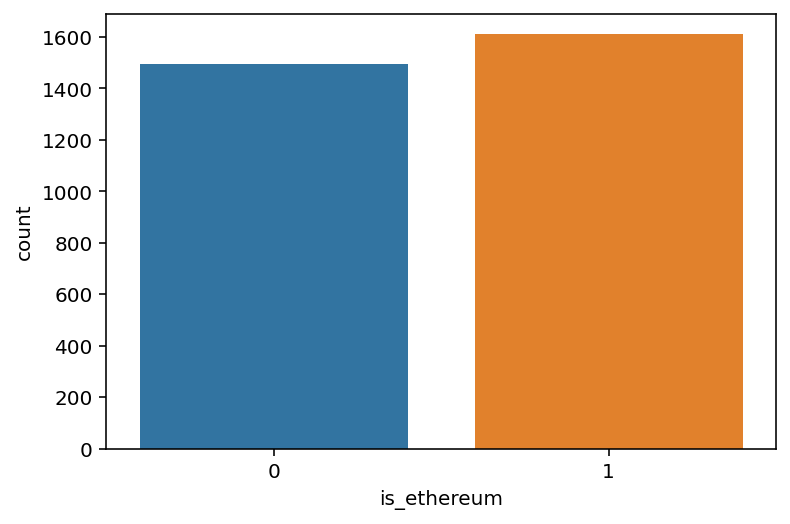

In [18]:
# create target dataframe
target_df = df[target]
_ = sns.countplot(x=target[0], data=target_df)

# inspect value counts
counts = target_df.value_counts()
pct = target_df.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print("\nFeature: {}".format('subreddit'))
display(pd.DataFrame({'counts': counts, 'Percent': pct}))

## Numerical Features
* num awards: really extreme values (-126 on one end, 3 on the other), however all quantiles are 0, indicating that majority are zeros
* char count: some outliers on the high range given 75% quantile is 335 & max is 3131
* Distribution almost identical in both subreddits.

count        mean         std    min    25%    50%    75%     max
char_count  3087.0  290.466148  265.959917   90.0  141.0  203.0  334.0  3131.0
score       3087.0    3.963395   14.847080 -126.0    1.0    2.0    3.0   420.0
num_awards  3087.0    0.007127    0.084132    0.0    0.0    0.0    0.0     1.0
sent_count  3087.0    3.765792    2.995117    1.0    2.0    3.0    4.0    34.0
word_count  3087.0   47.471979   42.516496    1.0   24.0   34.0   56.0   495.0

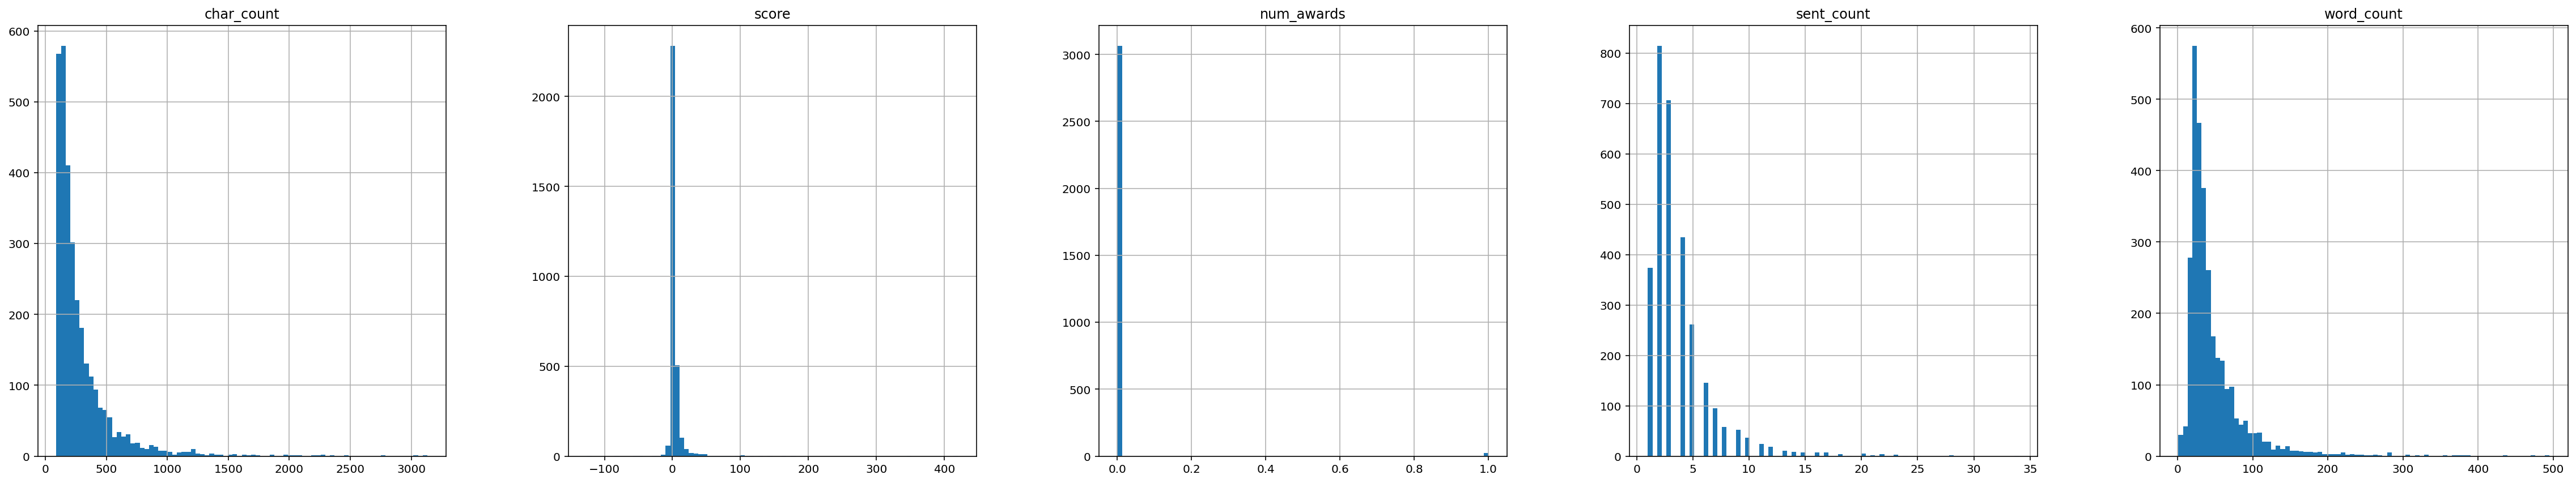

In [367]:
num_df = df[num_col]
display(num_df.describe().T)
_ = num_df.hist(bins=80, figsize=(40, 7), layout=(1, 5))

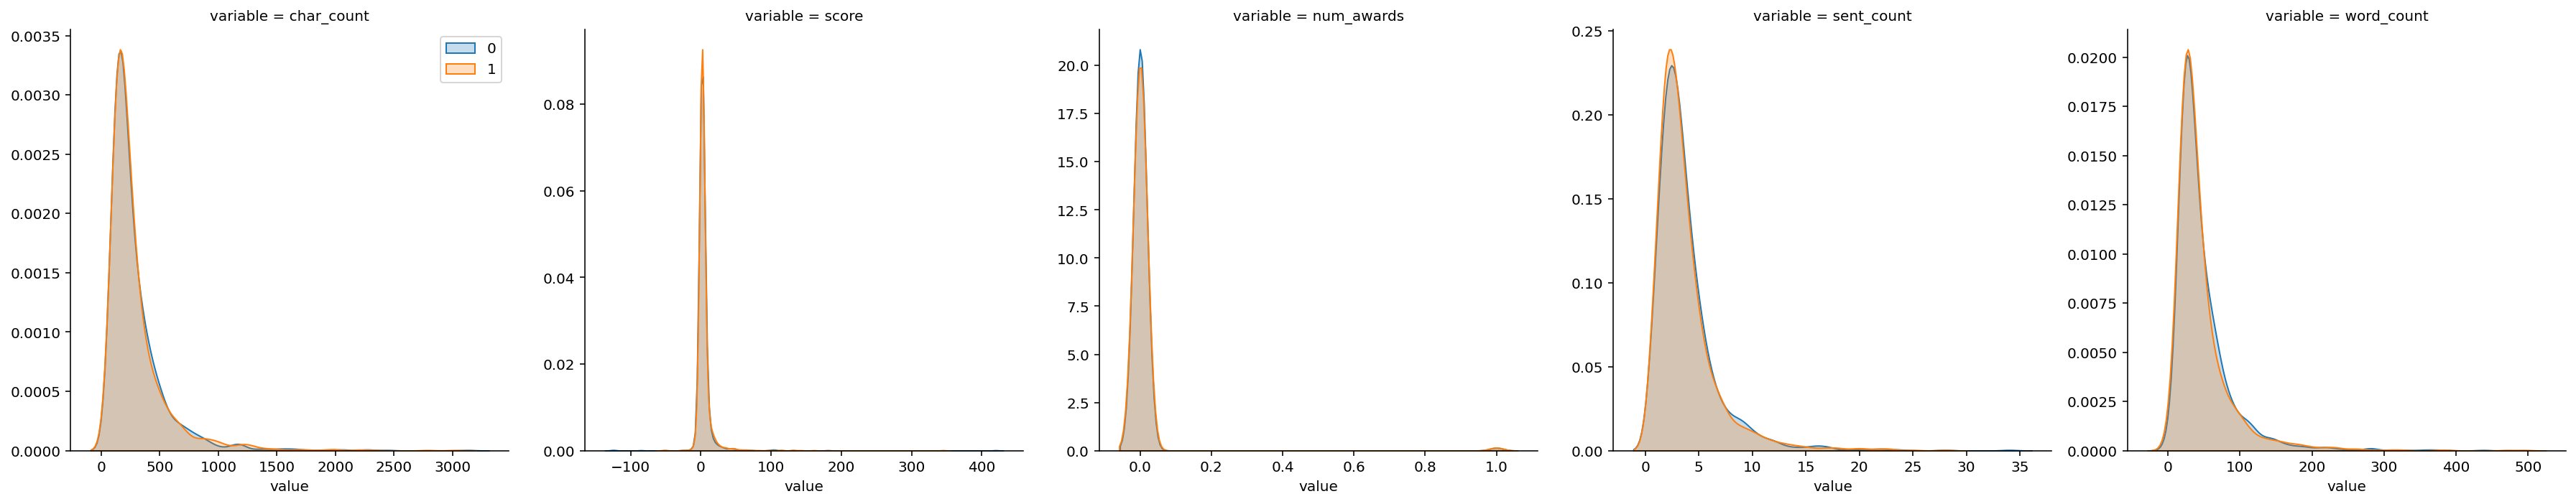

In [375]:
#print(pd.melt(id_vars = 'is_ethereum, '))
g = sns.FacetGrid(df[num_col + target].melt(target[0]), col='variable', hue=target[0], height=5, sharey = False, sharex=False, col_wrap=5)
g = g.map(sns.kdeplot, "value", shade=True)
g.axes[0].legend()

### char_count
* Looking at the commments, the longer comments seems to add more meaningful context and should help with the training --> Not removing

In [20]:
print(df[df['char_count'] > 182].shape)
df[df['char_count'] > 182].sort_values('char_count', ascending=False).head()

(1774, 15)


author    link_id   parent_id  num_awards  score  \
1493     Amber_Sam  t3_oosxfl   t3_oosxfl           0      6   
1908    david-song  t3_omg95e  t1_h5usb3b           0      1   
2135     bradp1234  t3_omxgln  t1_h5prvu7           0      2   
490     iwantbread  t3_oonhte  t1_h6247zv           0      0   
2617  DeviateFish_  t3_olla5w  t1_h5h9z8h           0      6   

                                                                                permalink  \
1493                         /r/Bitcoin/comments/oosxfl/need_help_buying_bitcoin/h60n19m/   
1908      /r/ethereum/comments/omg95e/the_most_beautiful_part_of_ethereum_is_the/h5v08xu/   
2135         /r/ethereum/comments/omxgln/aave_plans_to_build_twitter_on_ethereum/h5rfdax/   
490    /r/Bitcoin/comments/oonhte/joe_rogan_defending_bitcoin_to_peter_schiff_in/h62gmwl/   
2617  /r/ethereum/comments/olla5w/eip_3554_or_how_i_learned_to_stop_worrying_and/h5hei6z/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
1493  Exodus isn't an open source, I wouldn't trust them with my Bitcoin.   Anyway, congrats on the move, it's never too late. ONLY INVEST MONEY YOU CAN AFFORD TO LOSE.  Price wise, nobody knows what the price will be tomorrow, nor next week. Statistically, it's less than four years from now. Anyone who bought Bitcoin at any point in the past and held it for 4+ years is in profit.   **Try "Bitcoin ONLY" strategy for at least first year**, you'll sleep much better. Newcomers lose so much money, hol...   
1908  I feel like you've picked on the weakest point here. What about the points about the actual implementation that it's led to?  * If you run or create any kind of platform that allows users to upload images and share them, then unless you send every image to Microsoft, then you risk getting your door kicked in and your servers seized. * If you use this service heavily then you must pay a license fee, essentially regulatory capture that levies a tax on every image sharing service and ISP, forci...   
2135  Why do so many of you types just take things out of context and act like that proves you right? Popper’s argument doesn’t just stop there lmao, and hate speech isn’t necessarily something that can just be countered with traditional speech. How about you copy and paste in the REST of Popper’s argument instead of being disingenuous and arguing in bad faith? This is from Open Society and Enemies, literally from the part RIGHT AFTER you ended your quote:  “In this formulation, I do not imply, fo...   
490   You and I may look at his show like that but not everyone does.  You are right not everyone does but you can't make sure everyone fact checks things he says and it takes a lot of effort to speak in such a way that you make no mistakes when openly discussing important or sensitive topics. If you don't like him i don't expect you to be persuaded otherwise by me.   Other people doing the same thing is not a fair justification for doing something harmful.  It's not that i am justifying what he h...   
2617   How could they have total control over the network? If majority of the nodes run the new software with the changes, then it's because the nodes decided on doing that.  Because they carry the inertia of the default choice.  Again: changes they want to put into the clients (and thus make the default implementation) cannot be opposed save for a supermajority of users *rejecting* that change by not upgrading (and turning off automatic upgrades, if they have them on)--or worse yet, are forced to...   

             

In [21]:
# inspecting the opposite end of char_count
# Quality of content is a lot better now. A lot less rogue comments.
print(df[df['char_count'] < 141].shape)
df[(df['char_count'] < 141) & (df['char_count'] > 3)].sort_values('char_count').head(20)

(772, 15)


author    link_id   parent_id  num_awards  score  \
1099      ValueInvestments  t3_lan9o3  t1_gltrvtv           0      1   
622      throwingawayl8r00  t3_oom0d6  t1_h61g5oz           0      1   
1508                 px403  t3_op0trg  t1_h62k4u4           0      8   
834           NoDents4Life  t3_ooysk8   t3_ooysk8           0      6   
539                burusai  t3_oow526   t3_oow526           0     -1   
342            skinschamp1  t3_op41iy  t1_h62sq4l           0     -6   
1042                crimeo  t3_oovlhp  t1_h61fe1n           0     -6   
1028         chuckshick007  t3_ooi8zs   t3_ooi8zs           0      1   
2965          PeacockMamba  t3_ojnjs7  t1_h56fcac           0      1   
1870  FunCryptographer4761  t3_onnqei   t3_onnqei           0      1   
1211         Bloodsport121  t3_oowb94   t3_oowb94           0      4   
1585          btc_clueless  t3_ooyneh  t1_h61ur2j           0     26   
225            Neat-yeeter  t3_oowzq7   t3_oowzq7           0      1   
2225        opticblastoise  t3_omxgln  t1_h5oyvkt           0      7   
143               Jtown271  t3_op5jj0   t3_op5jj0           0     10   
447             OZIOZIOZIO  t3_oowzq7  t1_h62hb60           0      1   
853               VegaSpec  t3_oowzq7  t1_h61qadp           0     12   
2526                 LavoP  t3_oloceg  t1_h5ghsjj           0      1   
2159             Treyzania  t3_on9sf7   t3_on9sf7           0      3   
676                Seeders  t3_oowzq7  t1_h61ngcw           0      5   

                                                                                  permalink  \
1099  /r/Bitcoin/comments/lan9o3/hey_all_is_ledgerx_legit_im_looking_to_trade_some/h61fmwm/   
622   /r/Bitcoin/comments/oom0d6/if_you_own_025_btc_then_you_own_more_bitcoin_than/h625jbe/   
1508          /r/ethereum/comments/op0trg/asthon_kutcher_and_mia_kunis_talk_crypto/h63j3op/   
834                                         /r/Bitcoin/comments/ooysk8/lowest_fees/h61t4wr/   
539   /r/Bitcoin/comments/oow526/looks_like_btc_did_not_learn_its_lesson_from_last/h62chp3/   
342   /r/Bitcoin/comments/op41iy/its_sad_3_prominent_leaders_in_our_community_have/h62teym/   
1042                      /r/Bitcoin/comments/oovlhp/elon_musk_spacex_owns_bitcoin/h61i2ug/   
1028      /r/Bitcoin/comments/ooi8zs/warren_buffet_says_bitcoin_is_like_rat_poison/h61iwqj/   
2965  /r/ethereum/comments/ojnjs7/45_chance_that_eip1559_is_live_before_august_5th/h575ycd/   
1870       /r/ethereum/comments/onnqei/grayscale_just_launched_their_new_defi_fund/h5vuhij/   
1211                      /r/Bitcoin/comments/oowb94/illicit_activities_in_bitcoin/h61ahj5/   
1585                /r/ethereum/comments/ooyneh/elon_musk_admits_he_holds_ethereum/h62v7km/   
225    /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h632hxw/   
2225           /r/ethereum/comments/omxgln/aave_plans_to_build_twitter_on_ethereum/h5py9ax/   
143                                /r/Bitcoin/comments/op5jj0/scammer_on_the_prowl/h637zzv/   
447    /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h62k04g/   
853    /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h61s7rk/   
2526   /r/ethereum/comments/oloceg/messari_ethereum_is_poised_to_settle_8_trillion/h5itpp1/   
2159  /r/ethereum/comments/on9sf7/for_everyone_talking_about_aave_building_twitter/h5r4yvn/   
676    /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h621j90/   

                                                                                                      body  \
1099            One of their board members was vice chairman of the DTCC.     They are quite legit indeed.   
622       Unfortunately it is failing in doing so.  "It" is not failing, paper hands are failing to do so.   
1508    I bet Ashton was into Ethereum before you were: https://twitter.com/aplusktatus/465924993226788864   
834    Use Strike instead of Coinbase Pro. Fees are even lower & they d

### word_count

In [22]:
print(df[df['word_count'] ==10].shape)
df[(df['word_count']== 10)].sort_values('score', ascending=True).head(20)

(8, 15)


author    link_id   parent_id  num_awards  score  \
253   sweetsimplecode  t3_ooj8au  t1_h630fbu           0     -4   
1341  ItsSomethingNot  t3_oooxk2   t3_oooxk2           0      0   
92            F0xxenz  t3_oo2osn  t1_h62nayb           0      1   
529       hyperfreeto  t3_oo3lm3   t3_oo3lm3           0      1   
1792       cryptojonn  t3_oo07qo  t1_h5vg96a           0      1   
108     Mystic_Nipple  t3_oorfke  t1_h6305cv           0      3   
2401   SporeDruidBray  t3_olxrik  t1_h5icupk           0      4   
2544        hiyadagon  t3_om0e68  t1_h5ikpif           0      4   

                                                                                 permalink  \
253                      /r/Bitcoin/comments/ooj8au/daily_discussion_july_21_2021/h630jes/   
1341                 /r/Bitcoin/comments/oooxk2/the_b_word_conference_live_stream/h611ca0/   
92                     /r/Bitcoin/comments/oo2osn/my_friend_became_a_whole_coiner/h63dkmv/   
529   /r/Bitcoin/comments/oo3lm3/how_many_of_you_guys_have_used_lightning_network/h62d9j6/   
1792    /r/ethereum/comments/oo07qo/bank_of_korea_selects_major_ethereum_software/h5xq0bv/   
108                             /r/Bitcoin/comments/oorfke/keep_sight_of_20252030/h63bdwf/   
2401   /r/ethereum/comments/olxrik/london_bridge_may_be_falling_down_but_fear_not/h5kud4w/   
2544                              /r/ethereum/comments/om0e68/its_called_ethereum/h5ilmr9/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
253                                                                                                                                                                                                                                                                                                               No TA. I only analyse fundamentals. Please see my [other response](https://www.reddit.com/r/Bitcoin/comments/ooj8au/daily_discussion_july_21_2021/h62vkx1?utm_source=share&utm_medium=web2x&context=3).   
1341                                                                                                                                                                                                                                                                                                                                                                                   Ark Invest is gonna be streaming it on youtube: https://www.youtube.com/watch?v=Zwx\_7XAJ3p0&list=LL&index=5&ab\_channel=ARKInvest   
92                                                                                                                        Bitcoin Performance in its first decade (this includes traditional stocks) :\r   \r   [https://www.bloomberg.com/news/articles/2019-12-31/bitcoin-s-9-000-000-rise-this-decade-leaves-the-skeptics-aghast](https://www.bloomberg.com/news/articles/2019-12-31/bitcoin-s-9-000-000-rise-this-decade-leaves-the-skeptics-aghast)\r     I started in mid 2017.  Lets just say, im doing just fine.   
529                                                                                                                                                                                                                                                                                                                                                                                                            LN is great   Here is a whole panel discussion about it:   **https://www.youtube.com/watch?v=iCzqstr-7gU**   
1792               

### num_awards
* As expected, majority are zero. However, here, the data is very imbalanced -> Low variance, hence not going to be very useful

In [23]:
counts = df['num_awards'].value_counts()
pct = df['num_awards'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print("\nFeature: {}".format('num_awards'))
display(pd.DataFrame({'counts': counts, 'Percent': pct}))


Feature: num_awards


counts Percent
0    3084   99.3%
1      22    0.7%

### Looking at Correlations
* all numerical features seems to have no correlation with the target variable, which is not surprisingly


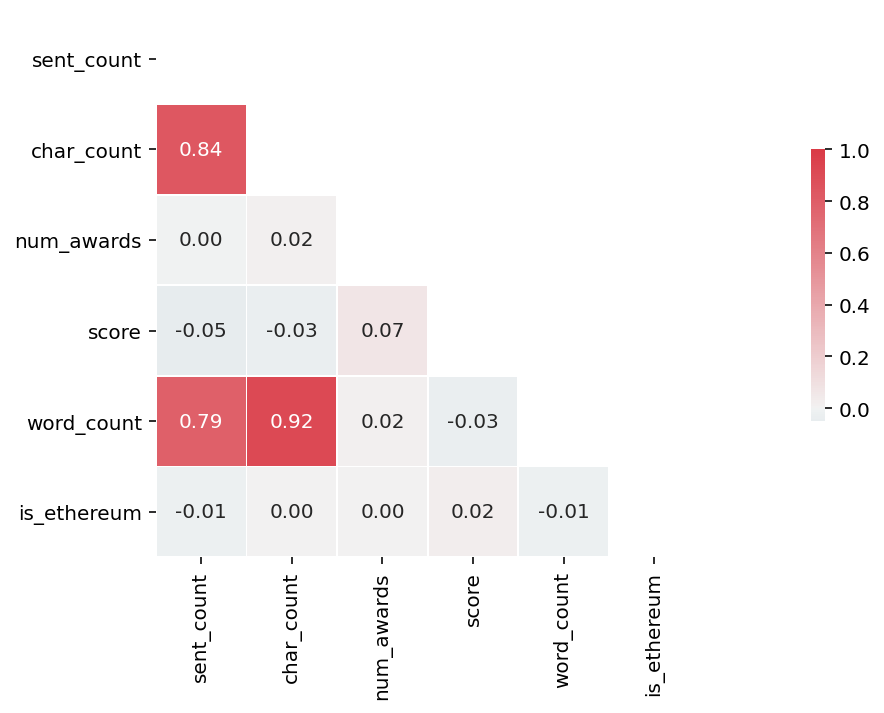

In [24]:
# Plotting heatmap
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(20, 5))

#Get correlation figures
corr = df[num_col + target ].corr()

# masking to remove duplicated half
mask = np.triu(np.ones_like(corr, dtype=bool))

# select color palette
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# plot heatmap
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',square=True, linewidths=.5, cbar_kws={"shrink": .5})


## Categorical Features

In [25]:
# setting up dataframe for categorical features
cat_df = df[['author', 'link_id', 'parent_id']]
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     3106 non-null   object
 1   link_id    3106 non-null   object
 2   parent_id  3106 non-null   object
dtypes: object(3)
memory usage: 72.9+ KB


In [26]:
def plot_cat(col_name):
    plot_df = pd.DataFrame.from_dict(Counter(cat_df[col_name].values.tolist()).most_common(20)).rename(columns={0:col_name, 1: 'freq_count'})
    display(plot_df.head(10))
    plot_df.plot(kind='barh',y='freq_count', x=col_name, figsize=(15,9))


def peek_text_cat(col_name, search_term):    
    display(df[df[col_name] == search_term][[col_name, 'is_ethereum','body']].head(10))

### author
* Generally users only posts in one subreddit.
* Only 2% posts in both subreddit
* Could be a useful indicator

author  freq_count
0       Perleflamme          44
1            crimeo          37
2         smartorgs          25
3      PeacockMamba          25
4           suburez          23
5   sweetsimplecode          22
6         bradp1234          19
7  InitialPiece1493          16
8             Ecefa          15
9           bogus83          14

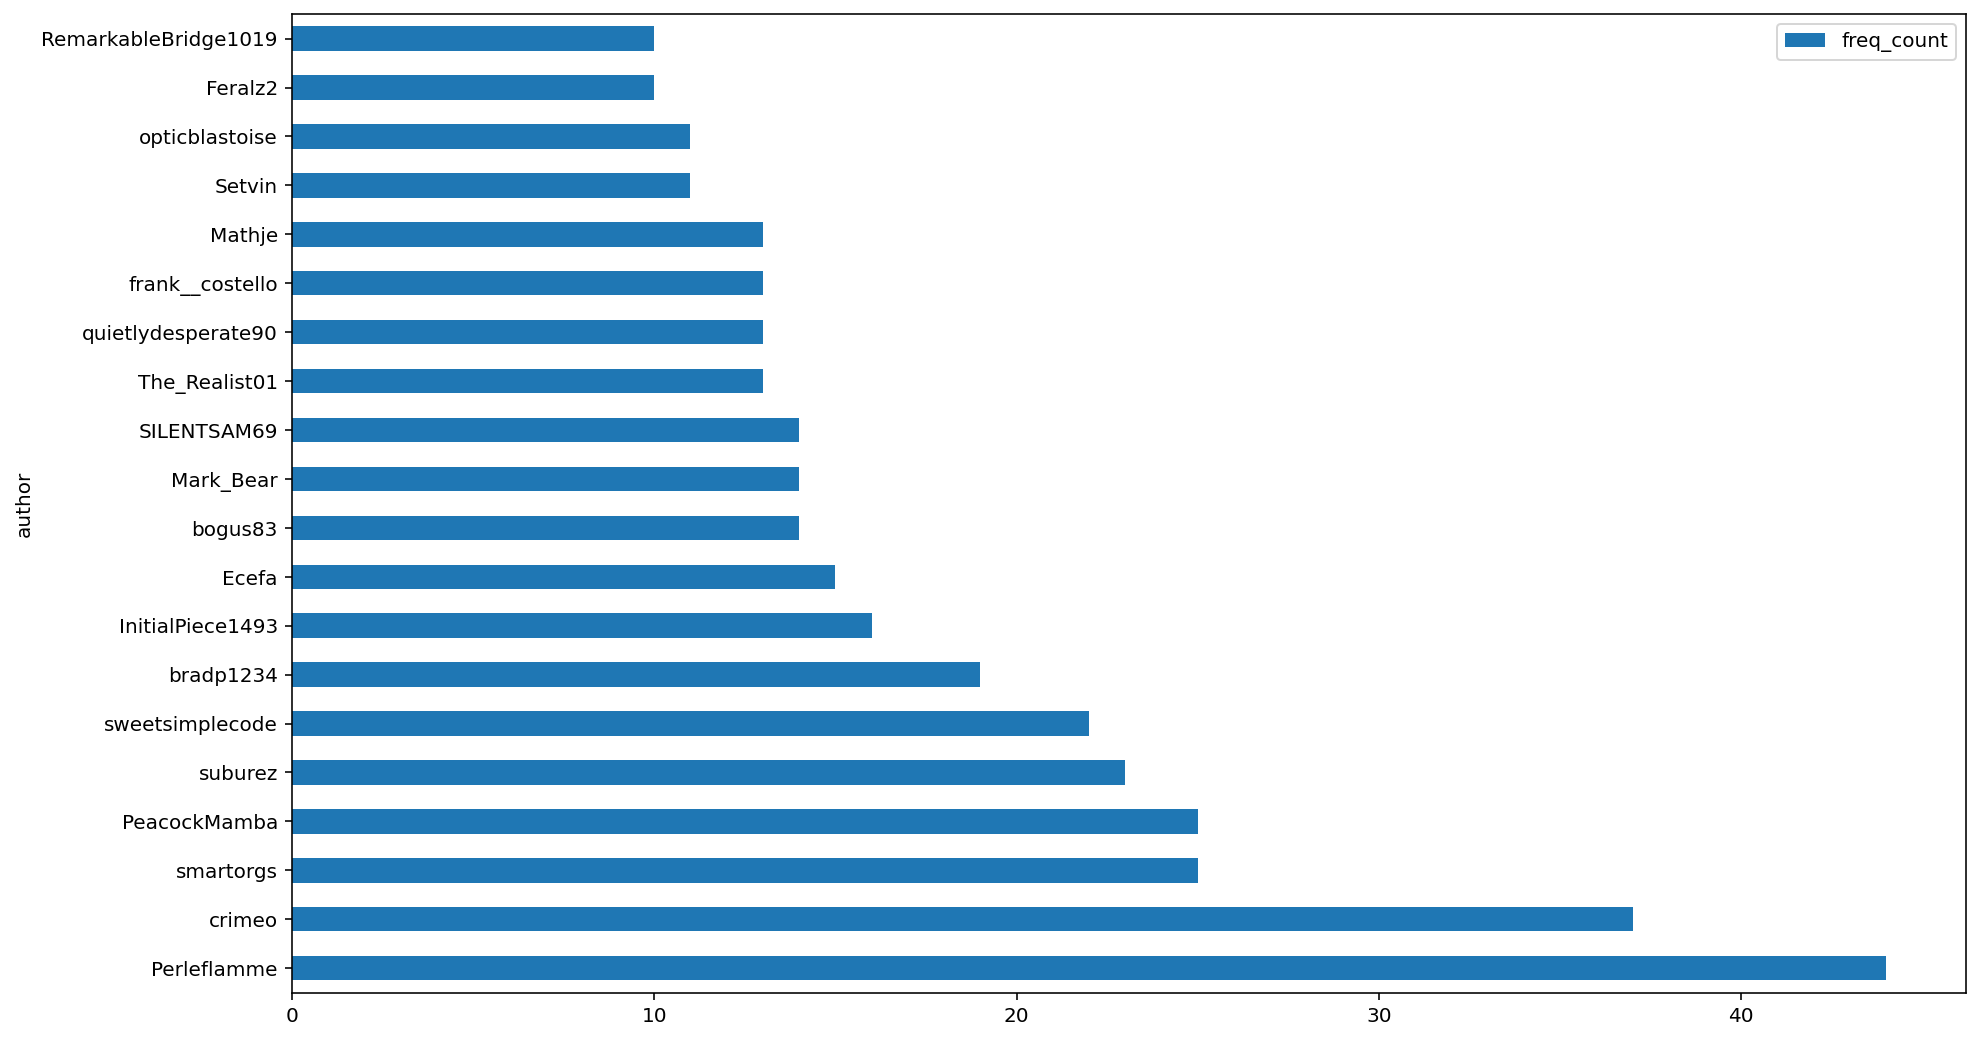

In [27]:
# coinfeeds-bot is a bot that posts news. Decided to include it to help out with the context
plot_cat('author')

* Love the contrast between bitcoin and ethereum
    * Bitcoin: more practical and updated. Bitcoin as a means to grow ones wealth
    *Ethereum: more conceptual with lots of technical terms.Crypto being a decentralized free currency

In [28]:
peek_text_cat('author', 'crimeo')

author  is_ethereum  \
0   crimeo            0   
3   crimeo            0   
4   crimeo            0   
9   crimeo            0   
13  crimeo            0   
14  crimeo            0   
21  crimeo            0   
23  crimeo            0   
27  crimeo            0   
74  crimeo            0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   body  
0                           There's a very easy solution that is fiscally responsible and doesn't require any crazy revolution or new technology. And does a significantly better job of solving than bitcoin.  It's called "raising taxes to pay for programs when you want to help the poor out."  I don't endorse printing money instead. I merely said "It is good for the poor [so long as the economy doesn't completely collapse]" which it is. It's not the best solution overall. Simple balanced budgets are.  
3                                                                                                                                                       Yes, and there were bankruptcies when banks failed  What does that have anything to do with the fact you are objectively wrong about loans not existing in a world with trustless currency? Nobody ever disagreed about historical bankruptcies or even mentioned it, random off topic junk.  People also used to wear pointy shoes. May as well bring that up.  
4    In real life Zimbabwe  TIL 5% inflation is "HyPeR inFlATiOn zomG ZimBabWEEEE" 🙄   You got $20,000 recently, good for you! You will buy necessary packages short term but what do you think will happen long term?  Nothing, actually, not to THAT guy. Even if it's 20% (which is highly unlikely. Maybe 20% overall spread out for awhile several years but not in one year)  * That person spent pretty much all of it since they were in an unemployed place of desperation. So their non-existent savings t...  
9                                                                                                                                                                                                                                                                                         Okay. Let me know when bitcoin takes over and you bend over backward to pay your taxes when asked, just like you do now, so that I can learn the best way to obey from you then too under the new bitcoin rules. It's a date.  
13                                                                                                                                   No. I am talking about when people used LITERAL GOLD COINS. Like in the middle ages and the renaissance.  They loaned money all the damn time still. So your theory that loans would stop being a thing with a completely trustless (you can measure density and test ductility etc and easily avoid adulteration), completely non-fiat currency is objectively, observably wrong.  
14                                                                                                                                                                  Can I join your flock? I think you're a better sheep than me, dutifully paying your taxes to the government every year like they tell you to and never standing up to them in real life when push comes to shove, only being tough with hypothetical words in internet arguments. I think I could learn a lot from you in the ways of sheepishness.  
21                                                                                                                                                                  

In [29]:
peek_text_cat('author', 'Perleflamme')

author  is_ethereum  \
1528  Perleflamme            1   
1533  Perleflamme            1   
1538  Perleflamme            1   
1604  Perleflamme            1   
1708  Perleflamme            1   
1737  Perleflamme            1   
1786  Perleflamme            1   
1793  Perleflamme            1   
1801  Perleflamme            1   
1808  Perleflamme            1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  
1528                                                                                           Except that it isn't one transaction anymore. Anyone can try to alter the state between your two or more transactions by inserting another transaction in between.  Maybe, one day, there will be a way to signal that the transaction isn't finished and that nothing should alter what's being done before the following transaction. In the mean time, from a modeling perspective of behaviors, it creates ugly cases.  
1533  To me, neither of Ethereum or Bitcoin SV codes are Türing complete in practice (though it may be the case in theory), due to the constraint that each transaction needs to be stored in at most one block, which heavily limits the quantity of instructions that can be executed.   It's like someone having a 3-second-span of life and all the skills to properly articulate any word. Even though they are theoretically able to pronounce any useful sentence, they can't realistically pronounce most of t...  
1538  For large adoption with a very big transaction frequency, I'd consider several L2 to be absolutely required. And maybe even L3.   Notably, a geographical L2 used by the shops of a given town would be a useful way to ensure minimal L1 commits: you don't need ultra high L1 security for your daily coffee transactions at the very same shops every time.   All you need is to be able to transact quickly and cheaply and, when you travel or once per week or month or the like, be quickly able to secur...  
1604  If I remember correctly, he was charged for having provided key data to North Korea about how to avoid US financial penalties. In practice, he seems to have participated in North Korea to a crypto forum and provided data that was freely accessible on the Internet.   I mean, at the time, thousands of people already figured out how to use Bitcoin. Claiming it wasn't freely available data when it's written on a public research paper is pure hypocrisy.   Except that it's an hypocrisy convicting ...  
1708                                                                                                                                                                                                                                                                  You're right. It's just that there will be way less ETH created. So, the supply shock conclusion still is true (something like the equivalent of 3 BTC halvings for ETH supply increases, aka a factor of 8) even though they used a false premise.  
1737  Lol, Proof of Authority. Out of question.   It's funny how he justified the use of PoA over PoW and PoS by explaining the drawback of PoW only: PoS doesn't use massive amounts of electricity, this was a big lie.   And it shows in his expression when he's finished his lie. He knows he's shown to people in the field he's not worthy of any kind of trust.   Besides, reinjecting the need to trust PoA validators into a system that is supposed to be decentralized and favor trustlessness to remove m...  
1786                                                                            

In [63]:
# Checking the proportion of authors who posts in both subreddits
# it seems the two groups are very different from one another with only about 1% hopping between the two subreddit
test_df = df[['author', 'is_ethereum']].drop_duplicates()
test_df = test_df.groupby('author')['is_ethereum'].count().to_frame('count')
print(test_df.head())
print('\n', '-'* 100, '\n')
print('Number of authors: {}'.format(test_df.shape[0]))
print('Number of authors who posts in both subreddits: {} ({}%)'.format(test_df[test_df['count'] == 2].shape[0], test_df[test_df['count'] == 2].shape[0] / test_df.shape[0] * 100)) 



                      count
author                     
--Slipp3ry__Snak3--       1
-BlissHunter-             1
-S-I-D-                   1
-trump-won-2020           1
11111111111122233446      1

 ---------------------------------------------------------------------------------------------------- 

Number of authors: 1632
Number of authors who posts in both subreddits: 18 (1.1029411764705883%)


### link_id

link_id  freq_count
0  t3_ooj8au         315
1  t3_oowzq7         127
2  t3_onina3         102
3  t3_omxgln         101
4  t3_ol7z7s          89
5  t3_ooaelc          79
6  t3_om0e68          78
7  t3_oovlhp          76
8  t3_on9sf7          76
9  t3_om5zsc          73

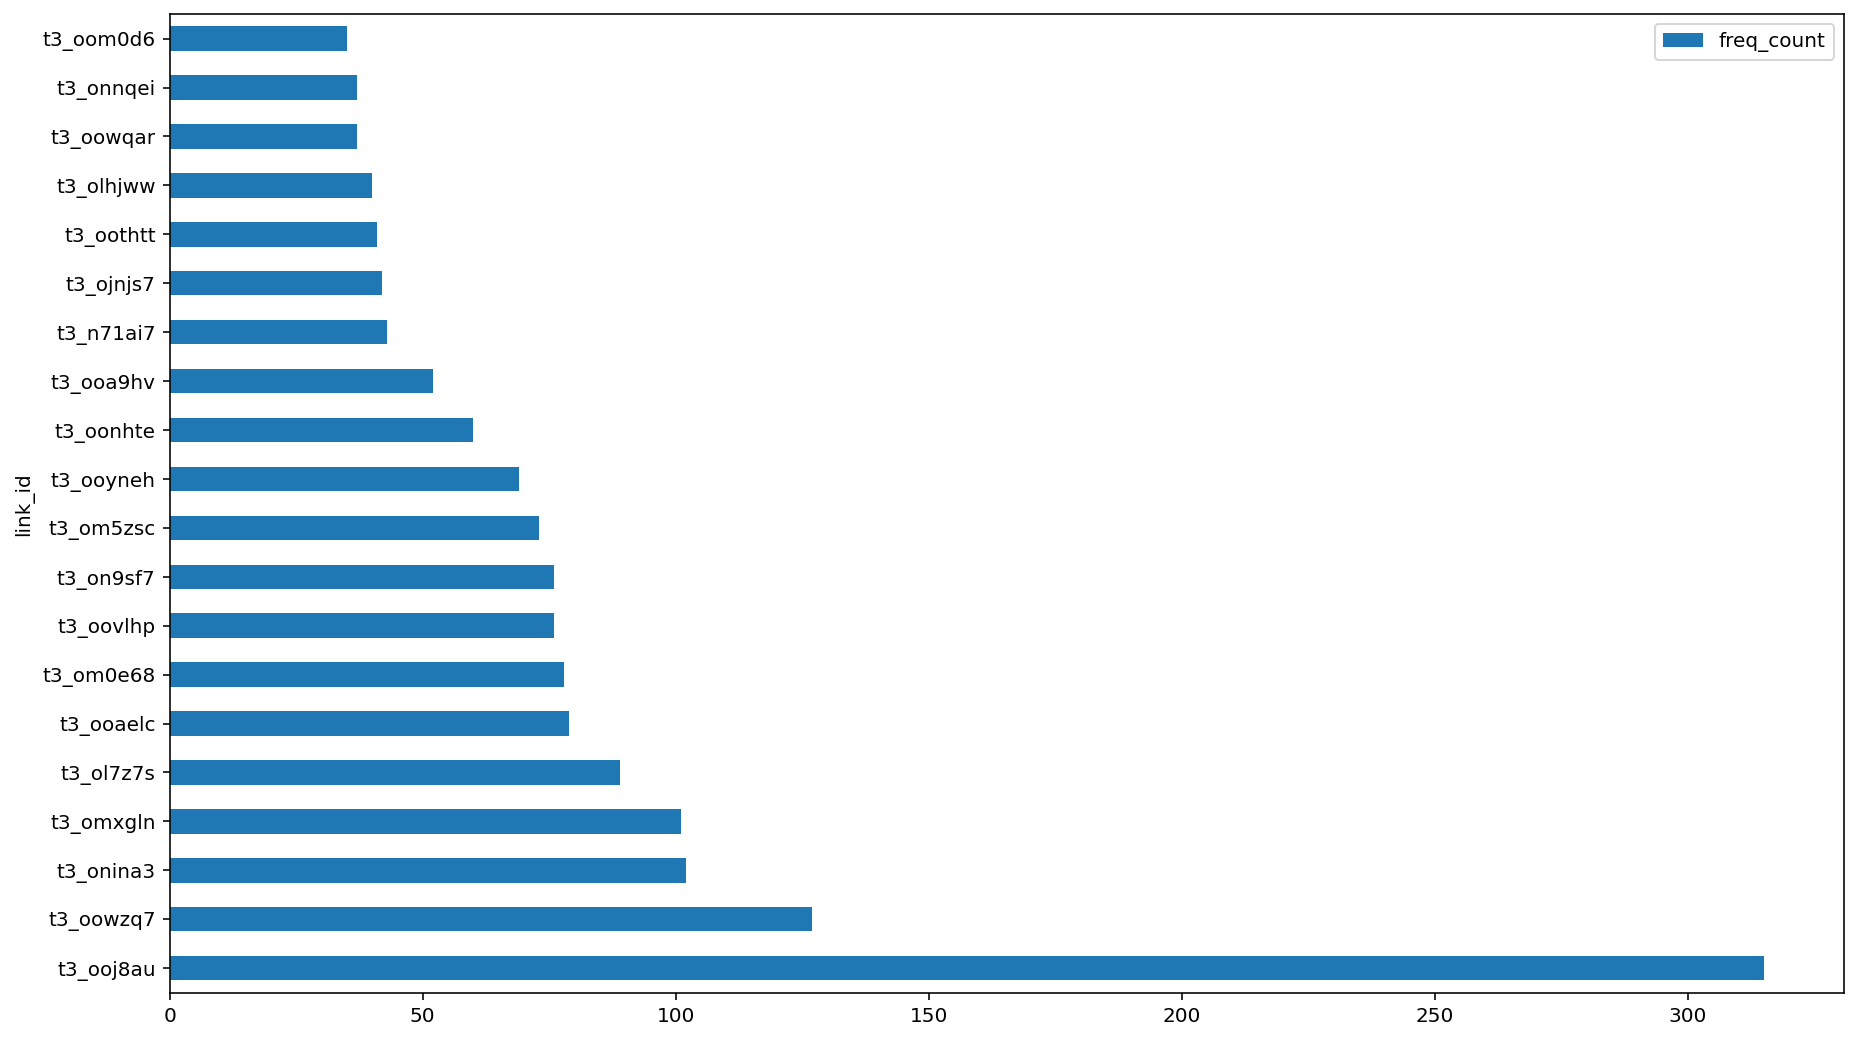

In [31]:
plot_cat('link_id')

* Bitcoin: The top thread talks abt the bitcoin market and Elon musk's influence on it
* Ethereum: The top thread in talks abt the gas fees relating to the mining of cryptocurrency

In [32]:
peek_text_cat('link_id', 't3_ooj8au')

link_id  is_ethereum  \
78   t3_ooj8au            0   
90   t3_ooj8au            0   
100  t3_ooj8au            0   
103  t3_ooj8au            0   
120  t3_ooj8au            0   
123  t3_ooj8au            0   
145  t3_ooj8au            0   
153  t3_ooj8au            0   
154  t3_ooj8au            0   
161  t3_ooj8au            0   

                                                                                                                                                                                                                                                                         body  
78                                                                                                                                         Yeah and it’s his son actually but in the future he puts his dads brain cells on his dick so basically a dickhead is our president  
90                                                                                                                                                           i think we are slowly weaning off elons market manipulation which is positive the conference only moved it up 2k  
100                                                  I haven’t checked the price since June 30. I know it probably hasn’t crashed or skyrocketed because no one has texted me out of the blue. Everyone’s different, but I just feel less stressed. See y’all in a few weeks!  
103                                                                                                             Jesus, after all the “fuck Elon, ignore him and stop giving the attention he craves” the top three posts are about him. And here I am posting too!! Damn it 🙄  
120                                                                                                                                                                  That isn't the only (recent) example of that... how about nearly half of Americans  voting for Dumpster?  
123                              Thanks for the advice  I think I will still do it, but at a lower amount than the 50% max I can do. Something easily manageable like closer to 10-15%. So, still a good transition of my portfolio to Bitcoin, but not a significant amount.  
145                                                          33% percent of the gain is not insignificant, especially when the downtrend continues. I know money makes people emotional and my best wishes to you. But  data has to be analysed based on logic, not emotions.  
153  In other words, there has been no dump. You're just predicting a dump. As usual for you.  You also totally evaded my question, no doubt because you are well aware that a price move of less than 1k is insignificant and par for the course with such a volatile asset.  
154                                                                                                                               I did it last March when everything hit the fan. No regrets. And you’re just paying yourself back, cheapest unsecured loan you’ll ever get.  
161                                                         A total pump of 3K. Then a loss of about $1K already. So, 33% of gains already gone. The rest will be gone in the coming hours and days and prices will be back to where they were before the event related pump.

In [33]:
peek_text_cat('link_id', 't3_onina3')

link_id  is_ethereum  \
1710  t3_onina3            1   
1732  t3_onina3            1   
1827  t3_onina3            1   
1845  t3_onina3            1   
1847  t3_onina3            1   
1863  t3_onina3            1   
1879  t3_onina3            1   
1881  t3_onina3            1   
1885  t3_onina3            1   
1913  t3_onina3            1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  
1710  Lol this is the most absurd "but I'm technically right" thing I've seen. The people asking about it clearly were referring to fees paid by the end user. Why the fuck would they be talking about anything else?  I'm well aware that your bank can have an agreement to pay the fees or whatever, but that's not what I'm talking about. Without doxxing myself by listing by name, but there are a couple chain convenience stores around me that have no-fee ATMs at every location, and it does not matter w...  
1732                                                                                                                                                                                                                                                                                                                                                                                                       Ok so I’m new to ethereum can someone fill me in ! I’m looking to have a full coin soon so I’m very excited :)  
1827                                                                                                                                                                                                                                         I figured those would be that much worse than the $3.99-$5 ones, I'm sure casino ones are probably like $10 (but you have a hot streak coming to make that back and more you can feel it).   But I've never been to one so I'd want to presume. Thanks for the confirmation.  
1845                                                                                                                                                                                                                                                                                                                                                   It’s not that it’s swinging. It’s just calculating incorrectly probably because u don’t have enough eth. It’s been a non critical issue with metamask for a while.  
1847                                                                                                                                                                                                                                                                        Its if demand for gas increases to 30,000,000 gas per 13 seconds. Also, if blocks were full for 20 blocks (4 minutes), base fee increases by 10x, its not slow, it changes pretty quickly.  https://notes.ethereum.org/@vbuterin/eip-1559-faq  
1863                                                                                                                                                                                                                                                                                                          Gas fees for anything have been insane!  (Not that insane but HIGH as fuel gas!!)  I have lost SHIB in Coinbase Wallet and have 1 transaction stuck in pending but no record of it on etherscan.  Perplexed  
1879                                                                                               

### parent_id

parent_id  freq_count
0   t3_ooj8au          68
1   t3_oowzq7          41
2   t3_onina3          24
3   t3_oovlhp          19
4   t3_oothtt          18
5  t1_h5511pg          17
6   t3_onupj4          15
7   t3_ol7z7s          14
8   t3_oow526          13
9   t3_ooyneh          13

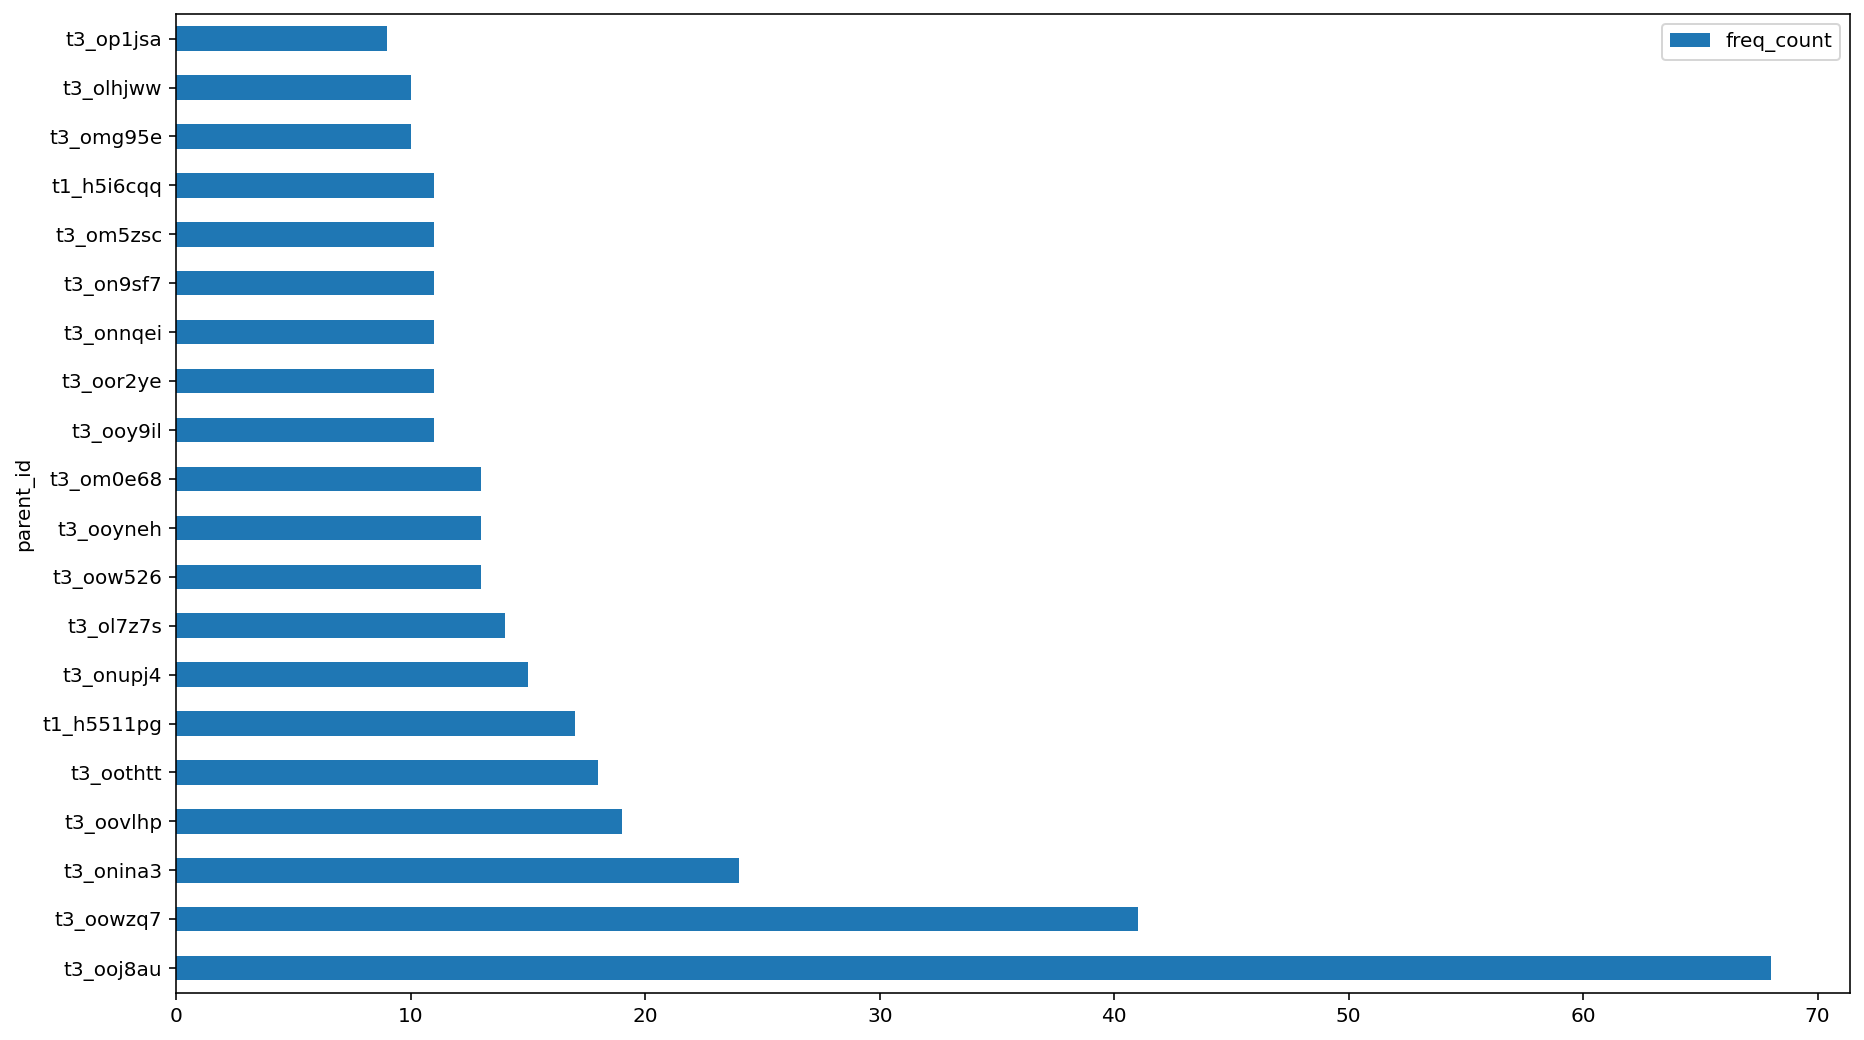

In [34]:
plot_cat('parent_id')

In [35]:
peek_text_cat('parent_id', 't3_ooj8au')

parent_id  is_ethereum  \
90   t3_ooj8au            0   
100  t3_ooj8au            0   
103  t3_ooj8au            0   
354  t3_ooj8au            0   
369  t3_ooj8au            0   
378  t3_ooj8au            0   
396  t3_ooj8au            0   
414  t3_ooj8au            0   
445  t3_ooj8au            0   
469  t3_ooj8au            0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    body  
90                                                                                                                                                                                                                                                                                                                                                                                                      i think we are slowly weaning off elons market manipulation which is positive the conference only moved it up 2k  
100                                                                                                                                                                                                                                                                                             I haven’t checked the price since June 30. I know it probably hasn’t crashed or skyrocketed because no one has texted me out of the blue. Everyone’s different, but I just feel less stressed. See y’all in a few weeks!  
103                                                                                                                                                                                                                                                                                                                                                        Jesus, after all the “fuck Elon, ignore him and stop giving the attention he craves” the top three posts are about him. And here I am posting too!! Damn it 🙄  
354                                                                                                                                                                                                                                                                                                                                                                                                             Today was the most bullish movement in awhile. Feeling pretty good with a sub 30k average for the moment  
369                                                                                                                                                                                                                                                                                                                        I wonder if it work to use decentralized protocol like bitcoin to allow everyone to have a say in law. Like the people ARE the government. No more puppets and profiteers. What do you think?  
378                                                                                                                                                                                                                                                                                                          Need to keep this thing above 32k (unless of course the same whale(s) that gave us the past BGD is hoping to let it dip a little, watch shorts open up, then liq them again, in which case I wouldn't mind)  
396                                        Can some with more knowledge explain what layer VISA/Mastercard is?  Ba

In [36]:
peek_text_cat('parent_id', 't3_oowzq7')

parent_id  is_ethereum  \
47   t3_oowzq7            0   
54   t3_oowzq7            0   
55   t3_oowzq7            0   
66   t3_oowzq7            0   
84   t3_oowzq7            0   
85   t3_oowzq7            0   
86   t3_oowzq7            0   
94   t3_oowzq7            0   
116  t3_oowzq7            0   
121  t3_oowzq7            0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    body  
47                                                                                                                                                                                                                                                                                                                                                                Restart the Wyckoff Distribution engine. Billionaires are locked and loaded and the shilling has begun. Dont forget to take profit near the top peeps!  
54                                                                                                                                                                                                                                                                                                                                                 Why this hate guys ? Just relax. Maybe he got regulation problems in China or something else. Nobody knows. And if he makes it for fun . Omg don’t care. Stop hating.  
55                                                                                                                                                                                                                                                                                                                                                                                 He is really good at manipulation though. And he sure is growing his social media presence to. Social media is everything these days.  
66                                                                                                                                                                                                                                                                                 Guys this is great. Bitcoin is heavily dependent on Elon (that’s why it has been going down the past few months). Once he starts accepting it again we should be in for another leg up.  Full disclosure, this is a troll. I gotchya.  
84                                                                                                                                                                                                           He knows the days of price volatility and market manipulation are nearing an end with Bitcoin.  Once more people adopt this, no tweet on earth will shake the price like his have ever again.  I don't think it's right, but I certainly understand why someone like Elon would do it while they still can.  
85                                                                                                                                                                                                                                                                                                                              These billionaires love to manufacture culture around themselves - Elon's no different. He's not a genius at everything, he just has the audience and the money to influence/manipulate.  
86                                                                                                                

## Textual Features

In [37]:
# Splitting into btc and eth datasets
btc_df = df[df['is_ethereum'] == 0]
eth_df = df[df['is_ethereum'] == 1]
display(btc_df.head())
display(eth_df.head())

author    link_id   parent_id  num_awards  score  \
0      crimeo  t3_op1972  t1_h63m62g           0      0   
1     evDev84  t3_oowzq7  t1_h62gazl           0      1   
2  arnaudmrtn  t3_op1972  t1_h63ltdv           0      1   
3      crimeo  t3_ooa9hv  t1_h63llzz           0      1   
4      crimeo  t3_op1972  t1_h63lcq8           0      1   

                                                                              permalink  \
0   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m8hw/   
1  /r/Bitcoin/comments/oowzq7/elon_musk_says_tesla_will_likely_start_accepting/h63m6pq/   
2   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63m62g/   
3                                    /r/Bitcoin/comments/ooa9hv/buying_the_dip/h63m4pf/   
4   /r/Bitcoin/comments/op1972/with_current_fud_dont_panic_sell_bitcoins_value/h63ltdv/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  body  \
0                          There's a very easy solution that is fiscally responsible and doesn't require any crazy revolution or new technology. And does a significantly better job of solving than bitcoin.  It's called "raising taxes to pay for programs when you want to help the poor out."  I don't endorse printing money instead. I merely said "It is good for the poor [so long as the economy doesn't completely collapse]" which it is. It's not the best solution overall. Simple balanced budgets are.   
1                                                                                                                                                                                                                                                                                                                                                                                     Tesla was warned beforehand.  Did you see that 4chan screenshot of someone calling the 30k bounce down to the minute of the day?   
2                                                                                                                                                                                                                                                                                                                                                                        As I mentionned I don't see any mention of sustainability problem in your comment so I would assume you are not looking for a solution. I am!   
3                                                                                                                                                      Yes, and there were bankruptcies when banks failed  What does that have anything to do with the fact you are objectively wrong about loans not existing in a world with trustless currency? Nobody ever disagreed about historical bankruptcies or even mentioned it, random off topic junk.  People also used to wear pointy shoes. May as well bring that up.   
4   In real life Zimbabwe  TIL 5% inflation is "HyPeR inFlATiOn zomG ZimBabWEEEE" 🙄   You got $20,000 recently, good for you! You will buy necessary packages short term but what do you think will happen long term?  Nothing, actually, not to THAT guy. Even if it's 20% (which is highly unlikely. Maybe 20% overall spread out for awhile several years but not in one year)  * That person spent pretty much all of it since they were in an unemployed place of desperation. So their non-existent savings t...   

                                                                    

author    link_id   parent_id  num_awards  score  \
1496  cyberspace-_-  t3_ooyneh  t1_h639o8e           0      3   
1497       FaceDeer  t3_oozgrp  t1_h61yis1           0      5   
1498  Christophorus  t3_ooyneh   t3_ooyneh           0      1   
1499   pcaversaccio  t3_op82xm   t3_op82xm           0     32   
1500       SonnyA85  t3_n71ai7  t1_h62ctvb           0      1   

                                                                           permalink  \
1496         /r/ethereum/comments/ooyneh/elon_musk_admits_he_holds_ethereum/h63ngza/   
1497  /r/ethereum/comments/oozgrp/former_ethereum_developer_virgil_griffith/h63nfej/   
1498         /r/ethereum/comments/ooyneh/elon_musk_admits_he_holds_ethereum/h63n0mv/   
1499              /r/ethereum/comments/op82xm/wait_for_it_crypto_with_kunis/h63mtn1/   
1500    /r/ethereum/comments/n71ai7/eth_20_and_what_will_happen_to_your_eth/h63mp9j/   

                                                                                                                                                                                                                     body  \
1496  It's so far ahead of the competition in NA. Europe is a different story. Check out Rimac Group and what technology will start popping up really really soon. Japan and Korea will eat us all alive together though.   
1497                           If his bail conditions required that he not log into his bank account, then yeah, he'd have been arrested for that. It's the legal system, they have the ability to do that sort of thing.   
1498                       WTF was he talking about slowing down the blockchain? It's like when he said just make the blocks bigger. It makes me think he knows very little about the actual technology and how it works.   
1499                                                                                                   Everyone can find the original video on Ashton's Twitter: https://twitter.com/aplusktatus/1417959228157878273?s=19   
1500                                                                                                    You don't know what it will do because it's essentially a Ponzi scheme. It will have its rug pulled at any moment   

                                                                                                                                                                                                         body_no_sym  \
1496  its so far ahead of the competition in na europe is a different story check out rimac group and what technology will start popping up really really soon japan and korea will eat us all alive together though   
1497                             if his bail conditions required that he not log into his bank account then yeah hed have been arrested for that its the legal system they have the ability to do that sort of thing   
1498                      wtf was he talking about slowing down the blockchain its like when he said just make the blocks bigger it makes me think he knows very little about the actual technology and how it works   
1499                                                                                                                                                         everyone can find the original video on ashtons twitter   
1500                                                                                                  you dont know what it will do because its essentially a ponzi scheme it will have its rug pulled at any moment   

                                                                                                                                                                                                                                              body_tok  \
1496  its, so, far, ahead, of, the, competition, in, na, europe, is, different, story, check, out, rimac, group, and, what, technology, will, start, popping, up, really, really, soon, japan, and, korea, will, eat, us, a

### Parts-Of-Speech (POS) Tagging
* POS tagging is a task of labelling each word in a sentence with its appropriate part of speech. 
* Parts of speech include nouns, verb, adverbs, adjectives, pronouns, conjunction and their sub-categories.

In [38]:
# POS Tagging
btc_text = ''.join(btc_df['body_no_stop'].values)   #''.join(btc_df['body_no_stop'].values)
btc_doc = nlp(btc_text)
# btc_pos = Counter([token.pos_ for token in btc_doc if token.is_stop != True and token.is_punct != True])
btc_pos_noun = Counter([token.text for token in btc_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'NOUN'])
btc_pos_verb = Counter([token.text for token in btc_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'VERB'])
btc_pos_adj =  Counter([token.text for token in btc_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'ADJ'])

eth_text = ''.join(eth_df['body_no_stop'].values)   #''.join(eth_df['body_no_stop'].values)
eth_doc = nlp(eth_text)
# eth_pos = Counter([token.pos_ for token in eth_doc if token.is_stop != True and token.is_punct != True])
eth_pos_noun = Counter([token.text for token in eth_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'NOUN'])
eth_pos_verb = Counter([token.text for token in eth_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'VERB'])
eth_pos_adj =  Counter([token.text for token in eth_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'ADJ'])

# print('\n\nPOS TAGGING FOR BITCOIN')
# print('-' * 100)
# print(btc_pos.most_common())

In [39]:
print('\n\nBITCOIN: TOP 20 NOUNS')
print('-' * 100)
print(btc_pos_noun.most_common(20))

print('\n\nETHEREUM: TOP 20 NOUNS')
print('-' * 100)
print(eth_pos_noun.most_common(20))



BITCOIN: TOP 20 NOUNS
----------------------------------------------------------------------------------------------------
[('bitcoin', 433), ('people', 315), ('btc', 229), ('price', 186), ('time', 167), ('money', 142), ('market', 128), ('energy', 118), ('way', 114), ('years', 91), ('tesla', 90), ('point', 81), ('wallet', 74), ('year', 69), ('value', 67), ('elon', 67), ('thing', 64), ('things', 62), ('fiat', 61), ('lot', 61)]


ETHEREUM: TOP 20 NOUNS
----------------------------------------------------------------------------------------------------
[('people', 362), ('money', 141), ('ethereum', 138), ('time', 119), ('fees', 116), ('network', 110), ('use', 98), ('way', 97), ('market', 91), ('gas', 90), ('crypto', 88), ('value', 85), ('price', 79), ('miners', 79), ('point', 76), ('blockchain', 75), ('thing', 75), ('chain', 74), ('things', 73), ('media', 72)]


In [41]:
print('\n\nBITCOIN: TOP 20 VERB')
print('-' * 100)
print(btc_pos_verb.most_common(20))

print('\n\nETHEREUM: TOP 20 VERBS')
print('-' * 100)
print(eth_pos_verb.most_common(20))



BITCOIN: TOP 20 VERB
----------------------------------------------------------------------------------------------------
[('think', 185), ('bitcoin', 157), ('buy', 108), ('know', 98), ('want', 84), ('said', 83), ('need', 78), ('going', 75), ('sell', 63), ('look', 50), ('understand', 49), ('saying', 48), ('bought', 47), ('trying', 46), ('believe', 46), ('goes', 39), ('stop', 38), ('talking', 38), ('makes', 38), ('got', 37)]


ETHEREUM: TOP 20 VERBS
----------------------------------------------------------------------------------------------------
[('think', 181), ('want', 124), ('decentralized', 109), ('know', 88), ('need', 87), ('going', 84), ('buy', 62), ('said', 61), ('trying', 51), ('understand', 50), ('look', 48), ('run', 42), ('makes', 40), ('got', 36), ('believe', 36), ('based', 36), ('having', 35), ('use', 35), ('bitcoin', 34), ('saying', 32)]


In [42]:
print('\n\nBITCOIN: TOP 20 ADJECTIVE')
print('-' * 100)
print(btc_pos_adj.most_common(20))

print('\n\nETHEREUM: TOP 20 ADJECTIVE')
print('-' * 100)
print(eth_pos_adj.most_common(20))



BITCOIN: TOP 20 ADJECTIVE
----------------------------------------------------------------------------------------------------
[('good', 97), ('better', 61), ('long', 57), ('big', 54), ('short', 48), ('best', 47), ('pretty', 45), ('real', 42), ('different', 42), ('new', 39), ('bad', 38), ('little', 36), ('high', 35), ('small', 33), ('poor', 31), ('wrong', 31), ('lower', 30), ('true', 28), ('open', 28), ('low', 28)]


ETHEREUM: TOP 20 ADJECTIVE
----------------------------------------------------------------------------------------------------
[('good', 114), ('new', 92), ('social', 78), ('better', 72), ('big', 60), ('smart', 59), ('real', 50), ('pretty', 50), ('bad', 48), ('different', 46), ('long', 42), ('great', 40), ('able', 39), ('eth', 39), ('centralized', 39), ('free', 37), ('likely', 36), ('high', 33), ('hard', 32), ('little', 31)]


### Named Entity Recognition (NER) 

NER List: CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, NORP, ORDINAL, ORG, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, WORK_OF_ART

In [43]:
btc_ner = Counter([ent.label_ for ent in btc_doc.ents])
btc_ner_gpe = Counter([ent.text for ent in btc_doc.ents if ent.label_ == 'GPE'])
btc_ner_ppl = Counter([ent.text for ent in btc_doc.ents if ent.label_ == 'PERSON'])
btc_ner_org =  Counter([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG'])

eth_ner = Counter([ent.label_ for ent in eth_doc.ents])
eth_ner_gpe = Counter([ent.text for ent in eth_doc.ents if ent.label_ == 'GPE'])
eth_ner_ppl = Counter([ent.text for ent in eth_doc.ents if ent.label_ == 'PERSON'])
eth_ner_org =  Counter([ent.text for ent in eth_doc.ents if ent.label_ == 'ORG'])

# print('\n\nNER TAGGING FOR BITCOIN')
# print('-' * 100)
# print(btc_ner.most_common())


In [44]:
print('\n\nBITCOIN: TOP 20 GPE (Countries, cities, states)')
print('-' * 100)
print([tup for tup in btc_ner_gpe.most_common(20) if tup[1] > 1])

print('\n\nETHEREUM: TOP 20 GPE (Countries, cities, states)')
print('-' * 100)
print([tup for tup in eth_ner_gpe.most_common(20) if tup[1] > 1])



BITCOIN: TOP 20 GPE (Countries, cities, states)
----------------------------------------------------------------------------------------------------
[('china', 22), ('kinda', 5), ('canada', 5), ('uk', 3), ('btc', 2), ('eu', 2), ('vroom', 2), ('qe', 2), ('el,', 2), ('rogan', 2), ('yada', 2), ('spike', 2), ('germany', 2)]


ETHEREUM: TOP 20 GPE (Countries, cities, states)
----------------------------------------------------------------------------------------------------
[('london', 10), ('china', 8), ('america', 6), ('russia', 5), ('kinda', 4), ('xrp', 3), ('gwei', 3), ('united', 3), ('fixes', 3), ('korea', 2), ('nano', 2), ('north, korea', 2), ('australia', 2), ('moon', 2), ('ill', 2), ('erc821', 2), ('taproot', 2), ('carbon14', 2), ('states', 2), ('uk', 2)]


In [45]:
print('\n\nBITCOIN: TOP 20 PEOPLE')
print('-' * 100)
print([tup for tup in btc_ner_ppl.most_common(20) if tup[1] > 1])

print('\n\nETHEREUM: TOP 20 PEOPLE')
print('-' * 100)
print([tup for tup in eth_ner_ppl.most_common(20) if tup[1] > 1])



BITCOIN: TOP 20 PEOPLE
----------------------------------------------------------------------------------------------------
[('joe', 42), ('jack', 23), ('wether', 9), ('satoshi', 5), ('bob', 4), ('jamie', 4), ('michael, saylor', 3), ('tim', 3), ('snl', 2), ('philip', 2), ('looney', 2), ('kathie', 2), ('sha256', 2)]


ETHEREUM: TOP 20 PEOPLE
----------------------------------------------------------------------------------------------------
[('l2', 11), ('devs', 10), ('jack', 6), ('hydra', 5), ('carbon14', 4), ('jackson', 4), ('ada', 3), ('ethereums', 3), ('chuck', 2), ('browser', 2), ('v3', 2), ('gore', 2), ('twitterlike', 2), ('joe', 2)]


In [46]:
print('\n\nBITCOIN: TOP 20 ORG (Companies, agencies, institutions, etc.)')
print('-' * 100)
print([tup for tup in btc_ner_org.most_common(20) if tup[1] > 1])

print('\n\nETHEREUM: TOP 20 ORG (Companies, agencies, institutions, etc.)')
print('-' * 100)
print([tup for tup in eth_ner_org.most_common(20) if tup[1] > 1])



BITCOIN: TOP 20 ORG (Companies, agencies, institutions, etc.)
----------------------------------------------------------------------------------------------------
[('ford', 8), ('sec', 7), ('bc', 6), ('gm', 5), ('fed', 5), ('irs', 3), ('cnbc', 3), ('etfs', 3), ('healthcare', 2), ('usa', 2), ('haha', 2), ('quantum', 2), ('chrysler', 2), ('app', 2), ('crypto', 2), ('s9', 2)]


ETHEREUM: TOP 20 ORG (Companies, agencies, institutions, etc.)
----------------------------------------------------------------------------------------------------
[('dai', 24), ('sec', 9), ('etfs', 9), ('crypto', 6), ('ford', 3), ('bc', 3), ('min', 3), ('microsoft', 3), ('fdic', 3), ('capitol', 3), ('ada', 2), ('app', 2), ('cnbc', 2), ('v2', 2), ('aaa', 2), ('nitrogen14', 2), ('max', 2), ('nba', 2), ('dapps, monthsyears', 2), ('upto', 2)]


In [47]:
#peek('jack')
peek('carbon14','eth')

author    link_id   parent_id  num_awards  score  \
1906  Bosphoramus  t3_omg95e  t1_h5v08xu           0      1   

                                                                            permalink  \
1906  /r/ethereum/comments/omg95e/the_most_beautiful_part_of_ethereum_is_the/h5v2acb/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
1906  Nuclear Weapon tests are a more plausible cause of climate change than industrial carbon emissions.\r  The detonation of a nuclear weapon creates a fireball that is many degrees hotter than the sun - this causes the breakdown of ozone molecules. The explosion then creates neutrons that strike the atmosphere causing massive amounts of nitrogen-14 to transform into carbon-14 with a modest half-life of 5,730 years.\r   \r   After being created in the upper atmosphere, most of the carbon-14 then...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              body_no_sym  \
1906  nuclear weapon tests are a more plausible cause of climate change than industrial carbon emissions the detonation of a nuclear weapon creates a fireball that is many degrees hotter than the sun this causes the breakdown of ozone molecules the explosion then creates neutrons that strike the atmosphere causing massive amounts of nitrogen14 to transform into carbon14 with a modest halflife of 730 years after being created in the upper atmosphere most of the carbon14 then forms into carbonmonoxi...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body_tok  \
1906  nuclear, weapon, tests, are, more, plausible, cause, of, climate, change, than, industrial, carbon, emissions, the, detonation, of, nuclear, weapon, creates, fireball, that, is, many, degrees, hotter, than, the, sun, this, causes, the, breakdown, of, ozone, molecules, the, explosion, then, creates, neutrons, that, strike, the, atmosphere, causing, massive, amounts, of, nitrogen14, to, transform, into, carbon14, with, modest, halflife, of, 730, years, after, being, created, in, the, upper, at...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             body_no_stop  \
1906  nuclear, weapon, tests, plausible, cause, climate, change, industrial, carbon, emissions, detonation, nuclear, weapon, creates, fireb

### Ngrams

In [437]:
btc_text =  ''.join(btc_df['body_no_stop'].values).split(', ')
eth_text =  ''.join(eth_df['body_no_stop'].values).split(', ')

def generate_ngrams(text, n:int, name:str):
    '''generates the top 3 most common ngrams groups'''
    n_grams = ngrams(text, n)
    #n_gramFreq = Counter(n_grams)
    #display(n_gramFreq.most_common(30))
    plot_df = pd.DataFrame.from_dict(Counter(n_grams).most_common(30)).rename(columns={0:name, 1: 'freq_count'})
    #display(plot_df.head())
    return plot_df

def plot_ngrams(n:int, name:str):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(35,12))
    
    
    plot_df_btc = generate_ngrams(btc_text, n, name)
    plot_df_btc.plot(kind='barh',y='freq_count', x=name, title ="Bitcoin", edgecolor=None, ax = ax1)
    
    plot_df_eth = generate_ngrams(eth_text, n, name)
    plot_df_eth.plot(kind='barh',y='freq_count', x=name, title ="Ethereum", ax = ax2)
    
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.tight_layout

#### Unigrams

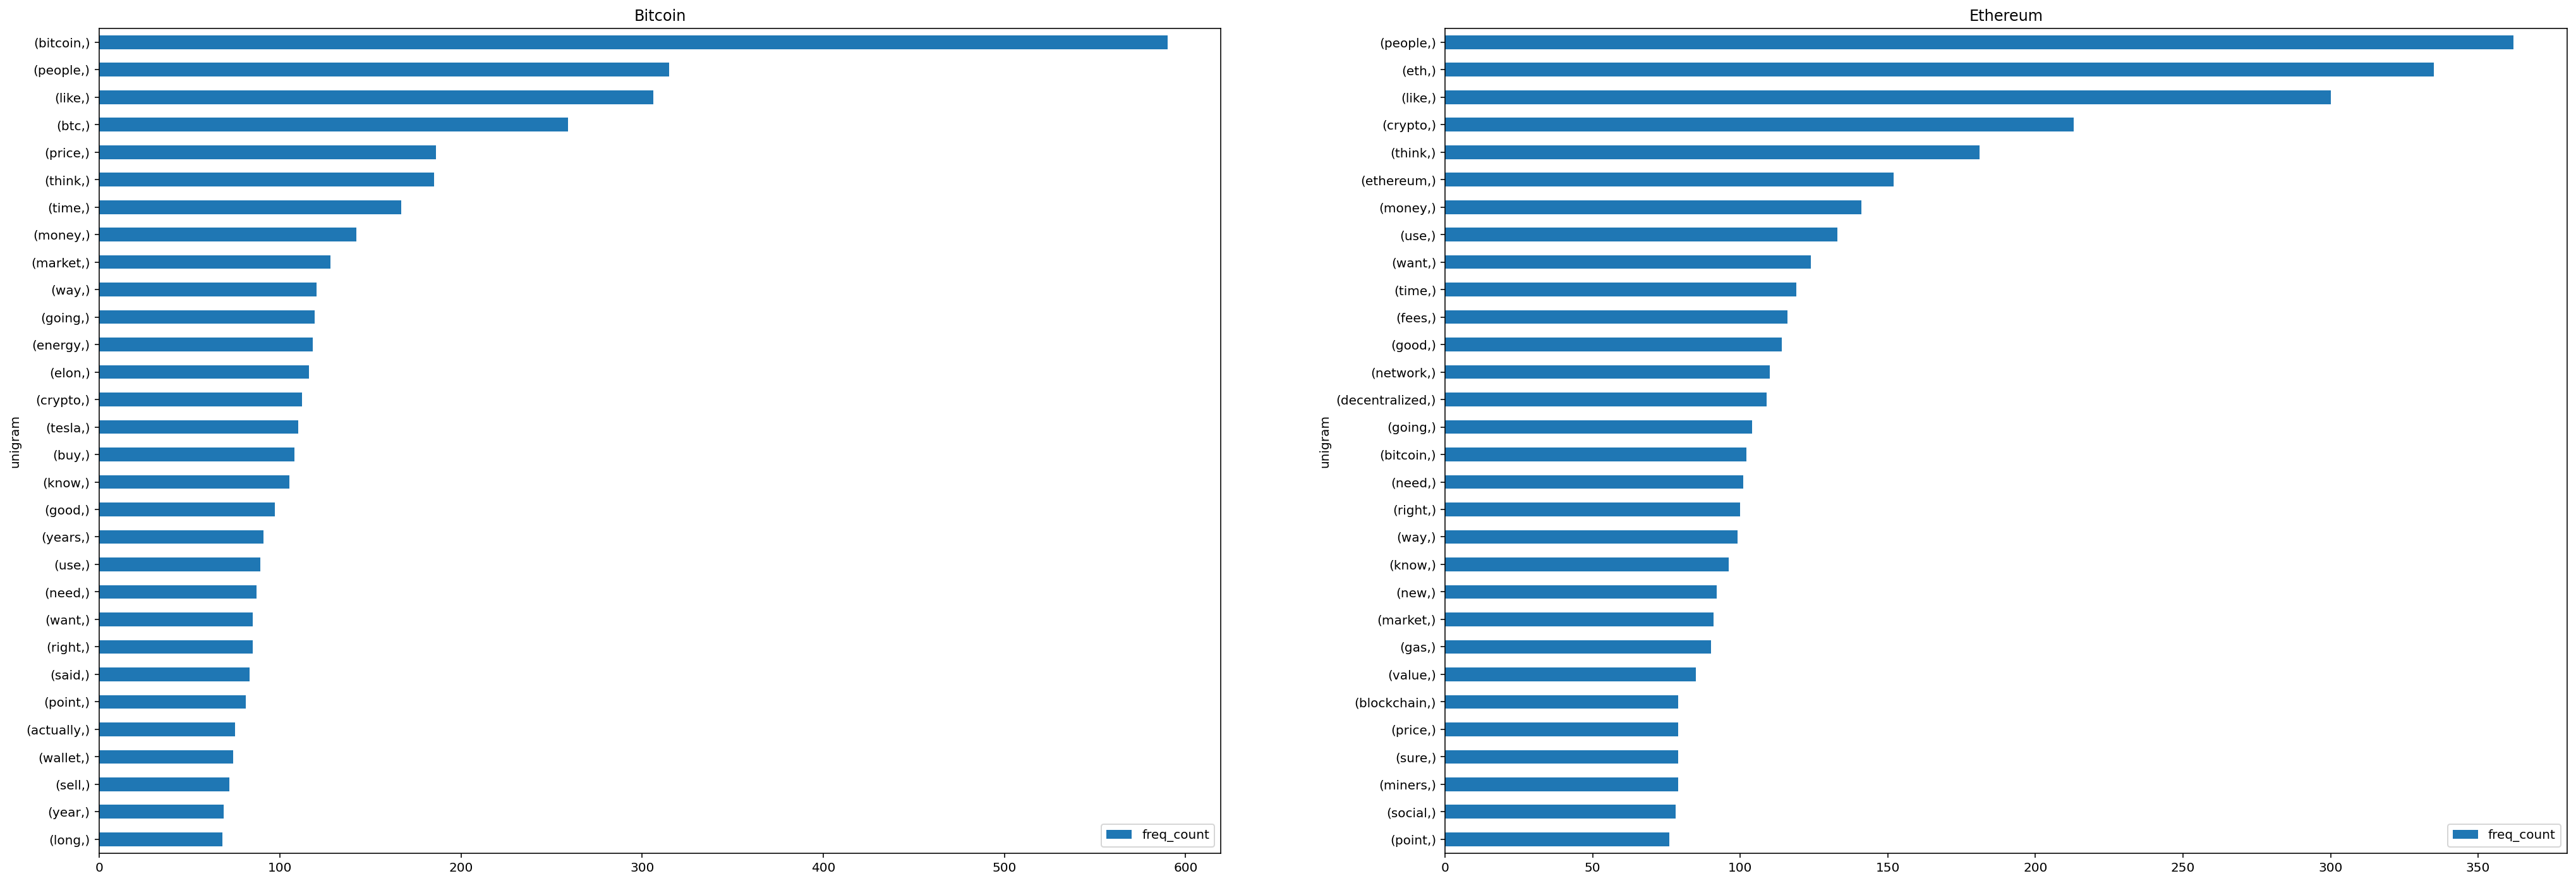

In [438]:
plot_ngrams( 1, 'unigram')

#### Bigrams

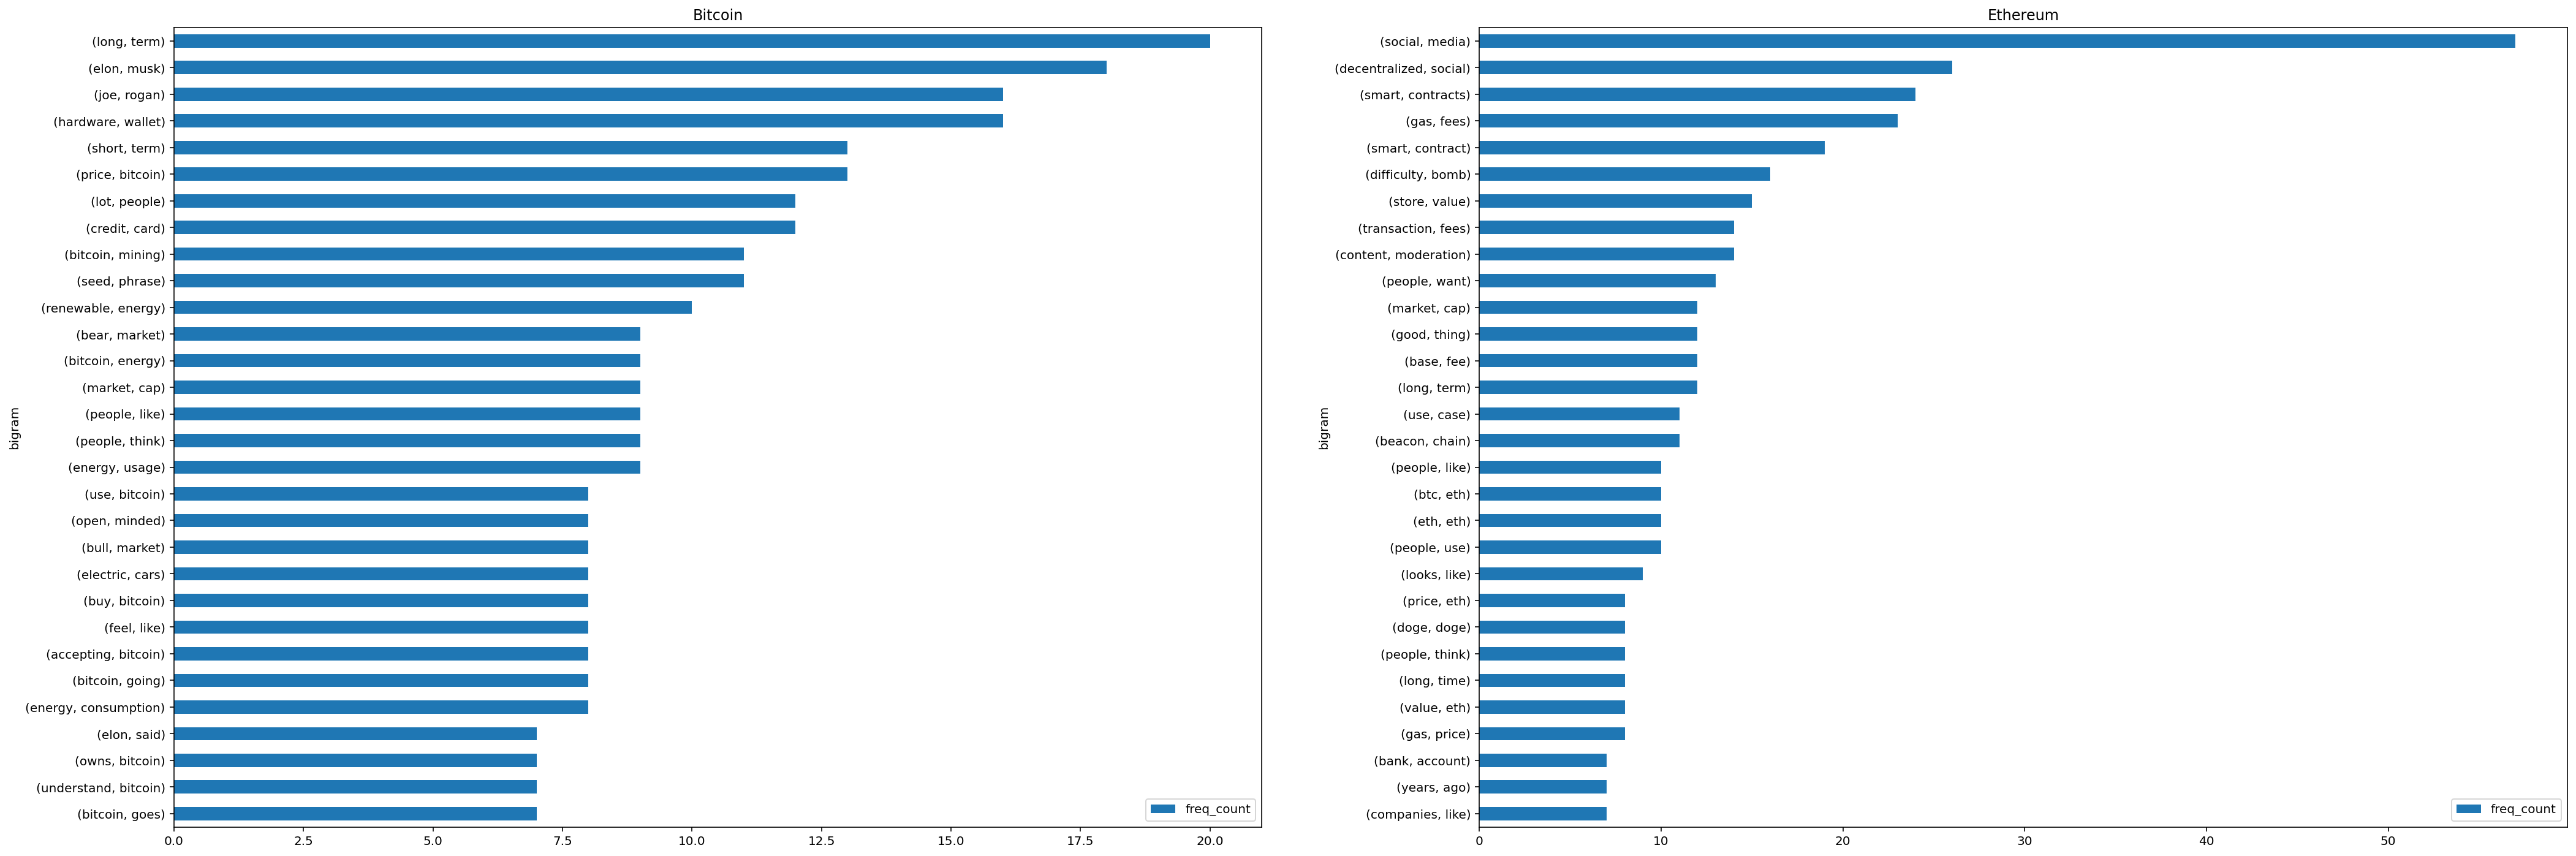

In [439]:
plot_ngrams(2, 'bigram')

#### Trigrams
* Here's the idea of growing wealth with Bitcoin is quite clear. Also evident is Elon Musk influence on Bitcoin
* With ethereum, it's its link with social media platforms that is evident here

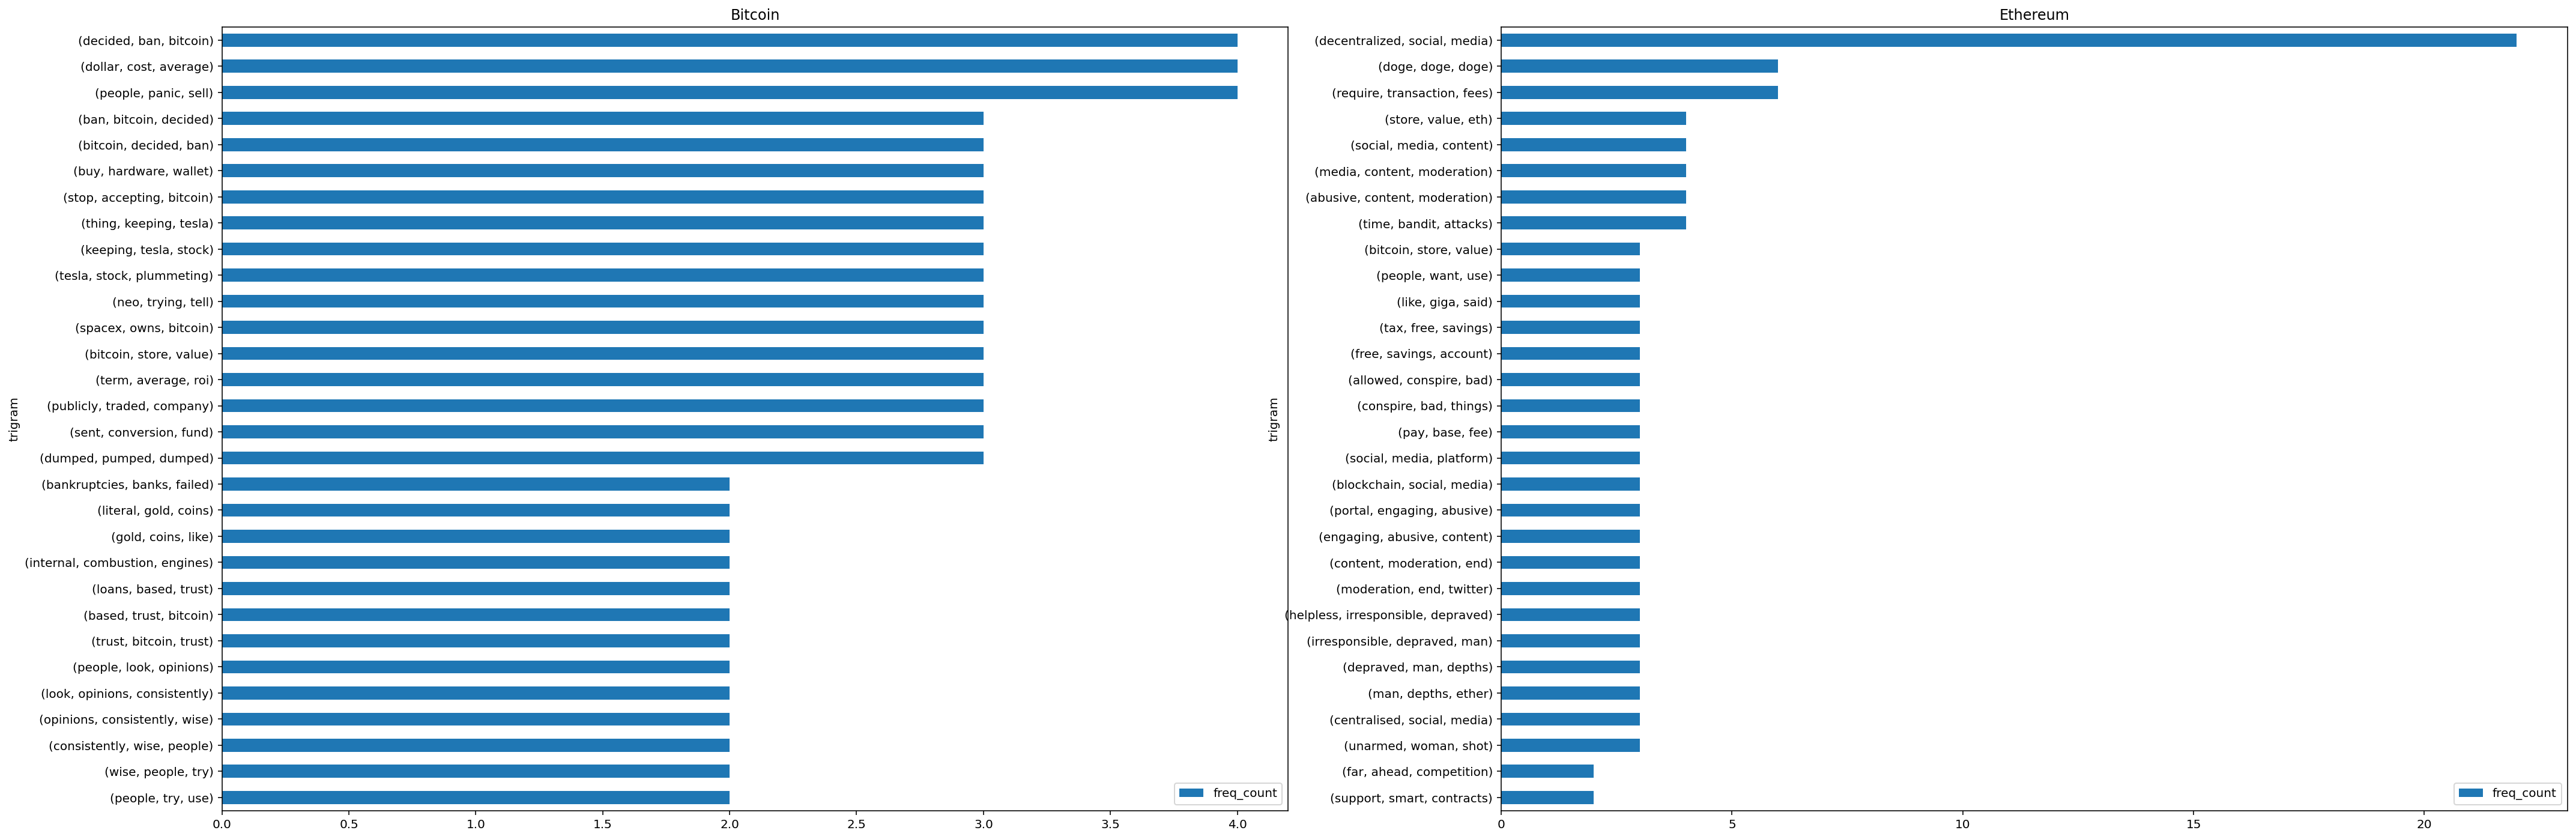

In [440]:
plot_ngrams(3, 'trigram')

#### Quadgrams
* At this point, combination are so rare there isnt much of a use anymore

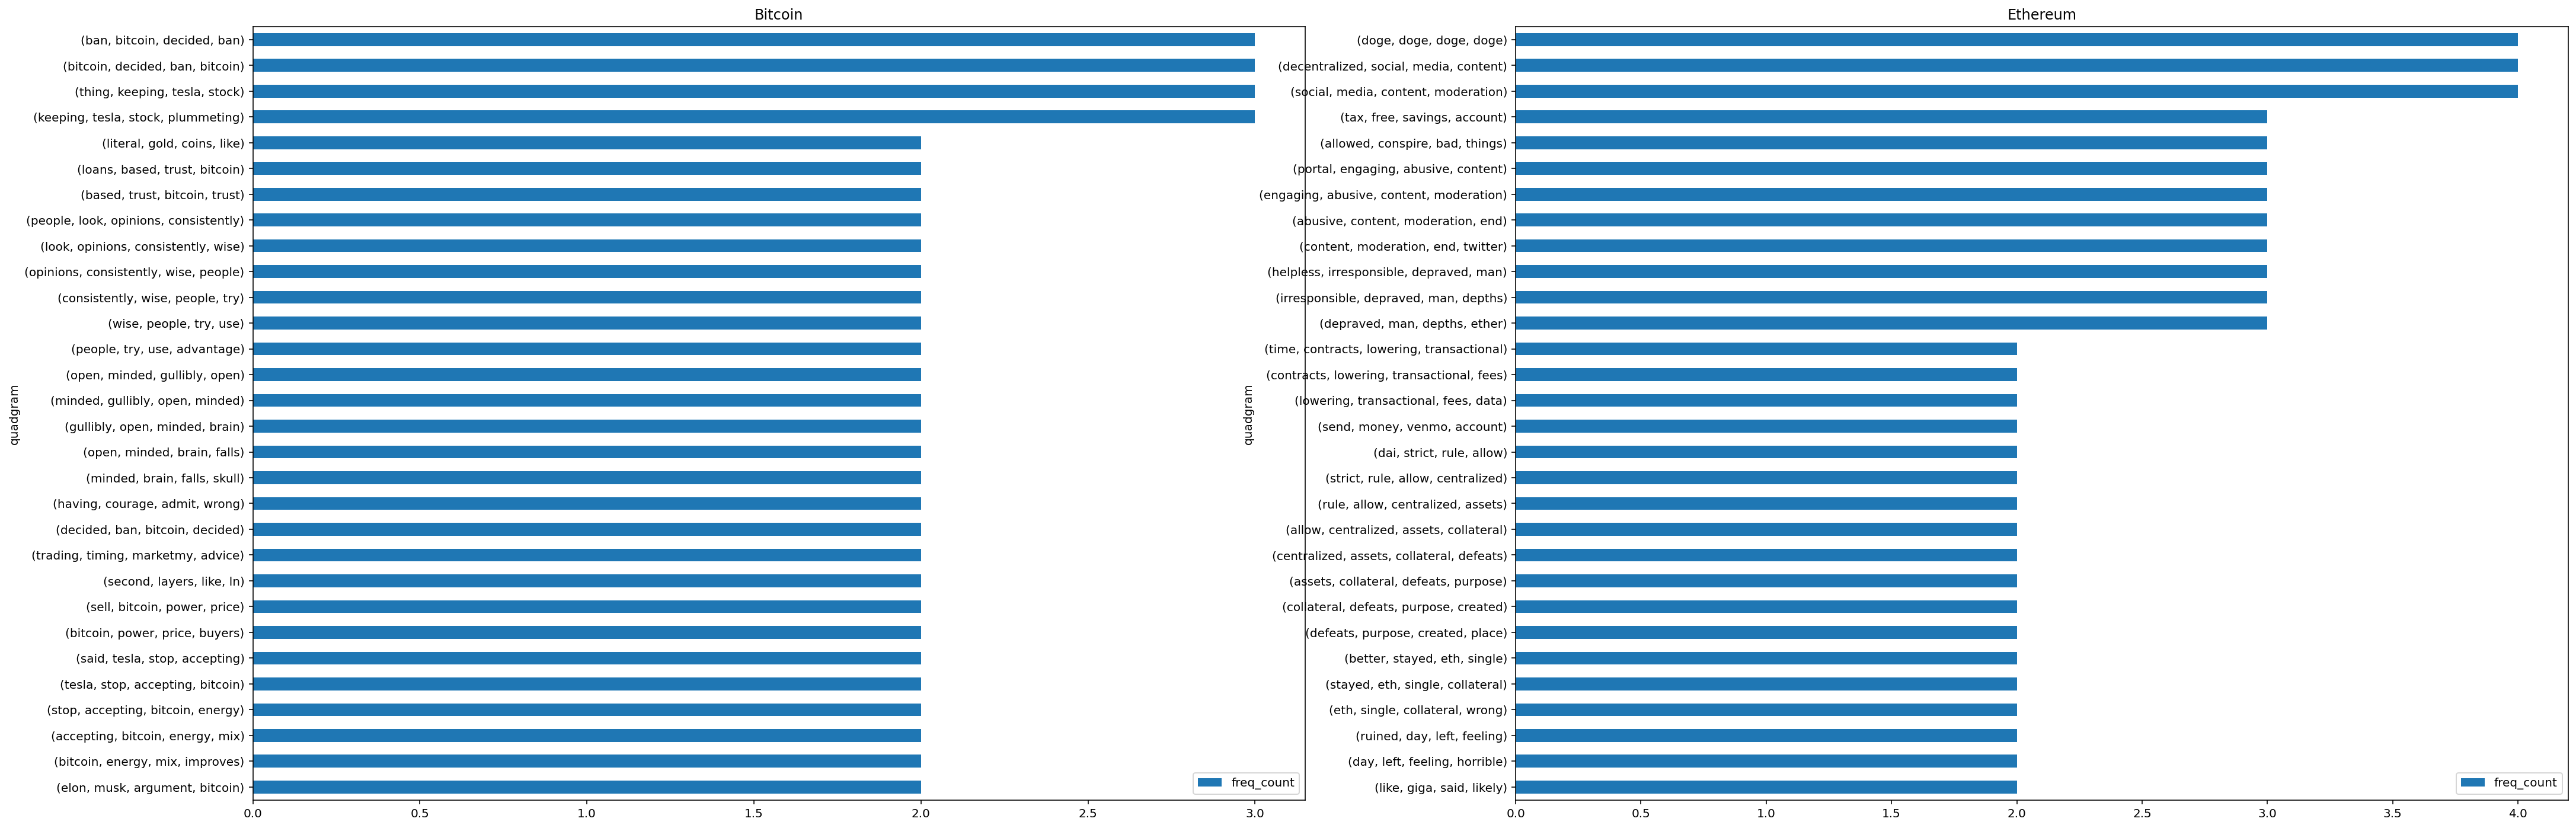

In [441]:
plot_ngrams(4, 'quadgram')

In [57]:
df = df.drop('permalink', axis='columns')
df = df[df['body_lemma']!='']
df.head()

author    link_id   parent_id  num_awards  score  \
0      crimeo  t3_op1972  t1_h63m62g           0      0   
1     evDev84  t3_oowzq7  t1_h62gazl           0      1   
2  arnaudmrtn  t3_op1972  t1_h63ltdv           0      1   
3      crimeo  t3_ooa9hv  t1_h63llzz           0      1   
4      crimeo  t3_op1972  t1_h63lcq8           0      1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  body  \
0                          There's a very easy solution that is fiscally responsible and doesn't require any crazy revolution or new technology. And does a significantly better job of solving than bitcoin.  It's called "raising taxes to pay for programs when you want to help the poor out."  I don't endorse printing money instead. I merely said "It is good for the poor [so long as the economy doesn't completely collapse]" which it is. It's not the best solution overall. Simple balanced budgets are.   
1                                                                                                                                                                                                                                                                                                                                                                                     Tesla was warned beforehand.  Did you see that 4chan screenshot of someone calling the 30k bounce down to the minute of the day?   
2                                                                                                                                                                                                                                                                                                                                                                        As I mentionned I don't see any mention of sustainability problem in your comment so I would assume you are not looking for a solution. I am!   
3                                                                                                                                                      Yes, and there were bankruptcies when banks failed  What does that have anything to do with the fact you are objectively wrong about loans not existing in a world with trustless currency? Nobody ever disagreed about historical bankruptcies or even mentioned it, random off topic junk.  People also used to wear pointy shoes. May as well bring that up.   
4   In real life Zimbabwe  TIL 5% inflation is "HyPeR inFlATiOn zomG ZimBabWEEEE" 🙄   You got $20,000 recently, good for you! You will buy necessary packages short term but what do you think will happen long term?  Nothing, actually, not to THAT guy. Even if it's 20% (which is highly unlikely. Maybe 20% overall spread out for awhile several years but not in one year)  * That person spent pretty much all of it since they were in an unemployed place of desperation. So their non-existent savings t...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           body_no_sym  \
0                                               theres a very easy solution that is fiscally responsible and 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3087 entries, 0 to 3105
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3087 non-null   object
 1   link_id       3087 non-null   object
 2   parent_id     3087 non-null   object
 3   num_awards    3087 non-null   int64 
 4   score         3087 non-null   int64 
 5   body          3087 non-null   object
 6   body_no_sym   3087 non-null   object
 7   body_tok      3087 non-null   object
 8   body_no_stop  3087 non-null   object
 9   body_lemma    3087 non-null   object
 10  sent_count    3087 non-null   int32 
 11  word_count    3087 non-null   int32 
 12  char_count    3087 non-null   int32 
 13  is_ethereum   3087 non-null   uint8 
dtypes: int32(3), int64(2), object(8), uint8(1)
memory usage: 304.5+ KB


In [59]:
# write to file
# this will be useful as a starting point for experimentation
df.to_csv('data/transformed_data.csv', index=False)

In [60]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

In [61]:
pd.set_option('display.max_rows', None) # adjust number of rows visible 
display(df[['body','body_no_stop','body_lemma']])

body  \
0                             There's a very easy solution that is fiscally responsible and doesn't require any crazy revolution or new technology. And does a significantly better job of solving than bitcoin.  It's called "raising taxes to pay for programs when you want to help the poor out."  I don't endorse printing money instead. I merely said "It is good for the poor [so long as the economy doesn't completely collapse]" which it is. It's not the best solution overall. Simple balanced budgets are.   
1                                                                                                                                                                                                                                                                                                                                                                                        Tesla was warned beforehand.  Did you see that 4chan screenshot of someone calling the 30k bounce down to the minute of the day?   
2                                                                                                                                                                                                                                                                                                                                                                           As I mentionned I don't see any mention of sustainability problem in your comment so I would assume you are not looking for a solution. I am!   
3                                                                                                                                                         Yes, and there were bankruptcies when banks failed  What does that have anything to do with the fact you are objectively wrong about loans not existing in a world with trustless currency? Nobody ever disagreed about historical bankruptcies or even mentioned it, random off topic junk.  People also used to wear pointy shoes. May as well bring that up.   
4      In real life Zimbabwe  TIL 5% inflation is "HyPeR inFlATiOn zomG ZimBabWEEEE" 🙄   You got $20,000 recently, good for you! You will buy necessary packages short term but what do you think will happen long term?  Nothing, actually, not to THAT guy. Even if it's 20% (which is highly unlikely. Maybe 20% overall spread out for awhile several years but not in one year)  * That person spent pretty much all of it since they were in an unemployed place of desperation. So their non-existent savings t...   
5                                                                                                                                                                                                                                                                                                                                            I think that value is probably subjective and a bit situational  So bitcoin has value to some people, because they see some situations where they need bitcoin's properties.   
6                                                                                                                                                                                                                                                                                         Yes I guess you could. It's more of a set and forgot kind of thing. Then we could partner with Celsius or nexo for example to earn interest over time. It's in my head at the minute mate.   Thanks for bringing that point up.   
7                                                                                                                                                                                                                                                                                                                                                        Yes, and there were bankruptcies when banks failed, now they get bailed out with fre